# Исследование объявлений о продаже квартир

## Содержание исследования <a id='contents'> </a>

* [1. Цель исследования](#purpose)  
* [2. Обзор данных](#data_overview)
* [3. Предобработка данных](#data_preprocessing)  
    * [3.1. Работа с пропусками](#gaps)  
     - [3.1.1. Пропуски в картографических данных](#gaps_in_map_data)  
     - [3.1.2. Пропуски в данных, добавленных пользователем](#gaps_in_manual_data)  
     - [3.1.3. Выводы](#conclusions_3_1)  
    * [3.2. Изменение типов данных](#types)  
    * [3.3. Обработка дубликатов](#duplicates)  
    * [3.4. Обработка аномальных значений](#anomalies)  
     - [3.4.1. Столбец last_price](#last_price)  
     - [3.4.2. Столбцы total_area, living_area, kitchen_area](#areas)  
     - [3.4.3. Столбцы floors_total, floor, rooms, balcony](#floors)  
     - [3.4.4. Столбец total_images](#total_images)  
     - [3.4.5. Столбец days_exposition](#days_exposition)   
     - [3.4.6. Столбцы airports_nearest, cityCenters_nearest](#airports)  
     - [3.4.7. Столбцы parks_nearest, ponds_nearest](#parks)  
     - [3.4.8. Столбцы parks_around3000, ponds_around3000](#parks3000)  
     - [3.4.9. Столбец first_day_exposition](#first_day_exposition)  
     - [3.4.10. Столбец ceiling_height](#ceiling_height)  
     - [3.4.11. Выводы](#conclusions_3_4)  
    * [3.5. Добавление новых столбцов](#add_new_columns)
* [4. Исследовательский анализ данных](#research)  
    * [4.1. Изучение параметров объектов](#parameters)  
     - [4.1.1. Общая площадь](#par_total_area)  
     - [4.1.2. Жилая площадь](#par_living_area)  
     - [4.1.3. Площадь кухни](#par_kitchen_area)  
     - [4.1.4. Цена объекта](#par_last_price)  
     - [4.1.5. Количество комнат](#par_rooms)  
     - [4.1.6. Высота потолка](#par_ceiling_height)  
     - [4.1.7. Этаж квартиры](#par_floor)  
     - [4.1.8. Тип этажа квартиры](#par_floor_type)  
     - [4.1.9. Общее количество этажей в доме](#par_floors_total)  
     - [4.1.10. Расстояние до центра города в метрах](#par_cityCenters_nearest)  
     - [4.1.11. Расстояние до ближайшего аэропорта](#par_airports_nearest)  
     - [4.1.12. Расстояние до ближайшего парка](#par_parks_nearest)  
     - [4.1.13. День и месяц публикации объявления](#par_day_month_of_exposition)  
     - [4.1.14. Время продажи квартиры](#par_days_of_exposition)  
     - [4.1.15. Выводы](#conclusions_4_1)  
    * [4.2. Исследование влияния параметров на стоимость квартиры](#parameters_to_price)  
    * [4.3. Расчёт средней цены квадратного метра по населенным пунктам](#price_per_m2)  
    * [4.4. Расчёт средней цены километра до центра города](#price_per_km)  
* [5. Итоги исследования](#research_results)

## 1. Цель исследования <a id='purpose'> </a>

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Данная работа состоит из следующих этапов:  
1) загрузка данных из файла, изучение общей информацию и построение общей гистограммы для всех столбцов таблицы;  

2) предобработка данных:  
 + найдем, изучим и заполним, где возможно, пропуски в данных;  
 + укажем возможные причины, которые могли привести к пропускам в данных;  
 + преобразуем тип данных, где это необходимо;  
 + избавимся от явных и неявных дубликатов;  
 + найдём и устраним аномальные значения в данных;  
 
3) добавление в таблицу новых столбцов со следующими параметрами:   
 + цена одного квадратного метра;  
 + день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
 + месяц публикации объявления;  
 + год публикации объявления;  
 + тип этажа квартиры (значения — «первый», «последний», «другой»);
 + расстояние до центра города в километрах;

4) проведение исследовательского анализа данных:  
 + изучим параметры объектов, построим гистограммы для каждого параметра и опишем все наблюдения;  
 + изучим, как быстро продавались квартиры;  
 + изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта;
 + посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра;  
 + изучим, как стоимость объектов зависит от расстояния до центра города и вычислим среднюю цену каждого километра до центра Санкт-Петербурга;  
 
5) напишем общий вывод.

## 2. Обзор данных <a id='data_overview'> </a>

Откройем файл с данными и выведем на экран первые 20 строк предоставленных данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В таблице представлены следующие данные:

* `total_images` - число фотографий квартиры в объявлении
* `last_price` - цена на момент снятия с публикации
* `total_area` - общая площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` - дата публикации
* `rooms` - число комнат
* `ceiling_height` - высота потолков (м)
* `floors_total` - всего этажей в доме
* `living_area` - жилая площадь в квадратных метрах (м²)
* `floor` - этаж
* `is_apartment` - апартаменты (булев тип)
* `studio` - квартира-студия (булев тип)
* `open_plan` - свободная планировка (булев тип)
* `kitchen_area` - площадь кухни в квадратных метрах (м²)
* `balcony` - число балконов
* `locality_name` - название населённого пункта
* `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м)
* `cityCenters_nearest` - расстояние до центра города (м)
* `parks_around3000` - число парков в радиусе 3 км
* `parks_nearest` - расстояние до ближайшего парка (м)
* `ponds_around3000` - число водоёмов в радиусе 3 км
* `ponds_nearest` - расстояние до ближайшего водоёма (м)
* `days_exposition` -  сколько дней было размещено объявление (от публикации до снятия)

Выведем на экран общую информацию о датафрейме.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из общих данных можно сделать следующие выводы:
1) во многих столбцах присутствуют пропуски;  
2) есть строки, где полностью отсутствуют картографические данные (столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`);  
3) тип данных в некоторых столбцах следует изменить:  
    - в столбцах `last_price`, `floors_total`, `balcony`, `airports_nearest`,  `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` c *float64* на *int64;*  
    - в столбце `is_apartment` должен быть булев тип данных, а не строковый;  
    - в столбце `first_day_exposition` необходимо преобразовать данные из строкового типа в тип *datetime*.

Построим общую гистограмму для всех столбцов таблицы.

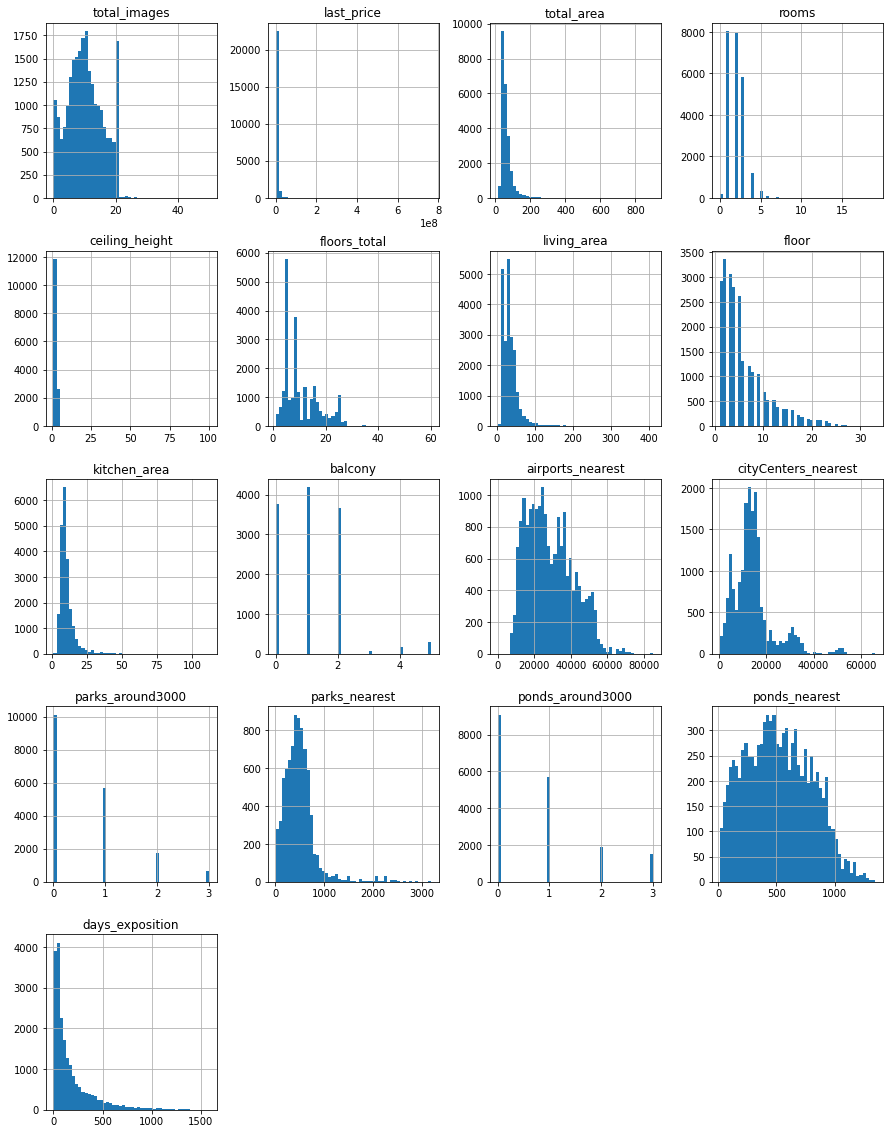

In [3]:
data.hist(bins=50, figsize=(15, 20));

## 3. Предобработка данных <a id='data_preprocessing'> </a>  

### 3.1. Работа с пропусками <a id='gaps'> </a> 

Определим, в каких столбцах есть пропуски данных.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Количество пропусков по столбцам таблицы' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

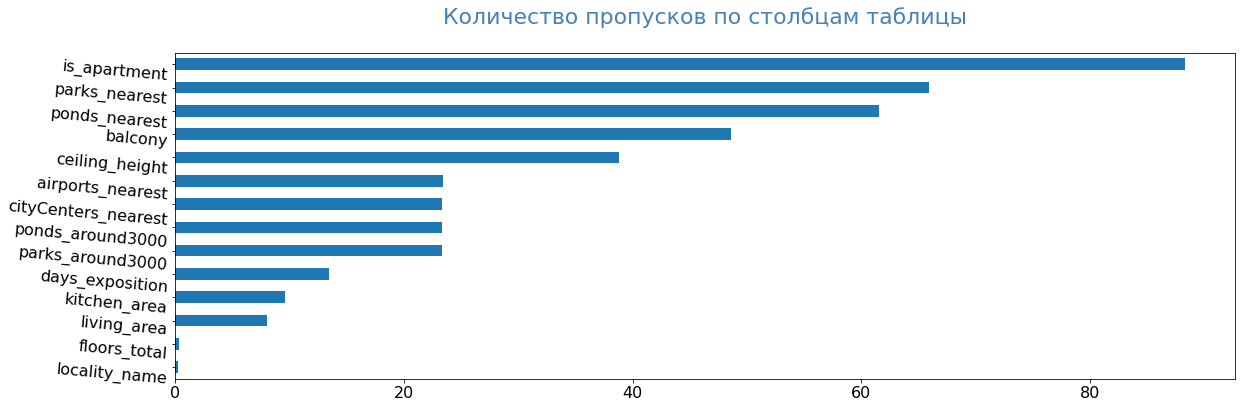

In [6]:
pass_value_barh(data)

#### 3.1.1. Пропуски в картографических данных <a id='gaps_in_map_data'> </a>

Рассмотрим пропуски в картографических данных, к которым относятся столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`.
Если в строке полностью отсутствуют картографические данные, это говорит о технической проблеме сбора или передачи данных по объекту недвижимости. Заполнить такие пропуски невозможно, поэтому оставим эти значения пустыми. Сохраним строки с полностью отсутствующими картографическими данными в переменную `cartographic_data_is_nan` и посчитаем количество строк с полностью отсутствующими картографическими данными.

In [7]:
cartographic_data_is_nan = data.query('airports_nearest.isna() and cityCenters_nearest.isna()\
                                      and parks_around3000.isna() and parks_nearest.isna()\
                                      and ponds_around3000.isna() and ponds_nearest.isna()')
print('Количество строк в датафрейме с полностью отсутствующими картографическими данными: {}'
      .format(len(cartographic_data_is_nan)))

Количество строк в датафрейме с полностью отсутствующими картографическими данными: 5518


Это значение совпадает со значением количества пропусков в столбцах `parks_around3000` и `ponds_around3000`, значит нет таких строк, где отсутствовали бы значения в столбцах `parks_around3000` и `ponds_around3000`, но при этом присутствовали бы другие картографические данные. Значит заполнить пропуски в столбцах `parks_around3000` и `ponds_around3000` не представляется возможным.

Выведем на экран ТОП-10 населенных пунктов с отсутствующими картографическими данными

In [8]:
cartographic_data_is_nan['locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

Как видно из списка выше картографические данные отсутствуют в основном по небольшим городам, деревням и посёлкам Лениниградской области.

Также в датафрейме есть строки, в которых отсутствуют только некоторые картографические данные. Наиболее часто встречаются пропуски в столбцах `parks_nearest` и `ponds_nearest`. Посчитаем количество строк с пропусками в этих столбцах не учитывая строки, где картографические данные отсутствуют полностью.

In [9]:
parks_and_ponds_nearest_is_na = data.query('(parks_nearest.isna() or ponds_nearest.isna())\
                                            and (not parks_around3000.isna())')
print('Количество строк в датафрейме с отсутствующими данными по расстоянию до ближайшего парка или водоема: {}'
      .format(len(parks_and_ponds_nearest_is_na)))

Количество строк в датафрейме с отсутствующими данными по расстоянию до ближайшего парка или водоема: 13357


Выясним, какие значения имеют столбцы `parks_around3000` и `ponds_around3000` при отстутвующих значениях в столбцах `parks_nearest` и `ponds_nearest` соотвтетсвенно.

In [10]:
parks_and_ponds_nearest_is_na.query('parks_nearest.isna()')['parks_around3000'].value_counts()

0.0    10102
Name: parks_around3000, dtype: int64

In [11]:
parks_and_ponds_nearest_is_na.query('ponds_nearest.isna()')['ponds_around3000'].value_counts()

0.0    9071
Name: ponds_around3000, dtype: int64

В датафрейме есть строки, где для объекта недвижимости не указаны значения расстояния до ближайшего парка или водоёма, но число парков или водоёмов в радиусе 3 км указано равным нулю. Это значит, что расстояние до ближайшего парка или водоёма более 3000 м. Теоритически, такие пропуски в значениях расстояния до ближайшего парка или водоёма можно заполнить любым значением >3000, чтобы объект недвижимости попал в соответствующую категорию по этим параметрам, но парки и пруды не самые важные параметры квартиры, поэтому оставим данные без изменений.  
Также существует небольшое количество пропусков в столбцах `airports_nearest` и `cityCenters_nearest`, которые не относятся к полному отсутствию картографических данных (т.е. другие картографические данные присутствуют). Таких пропусков 24 и 1 соответственно. Наличие пропусков может быть связано с тем, что это расчетные данные и система по какой-то причине не смогла рассчитать расстояния для конкретных объектов. Оставим эти данные без изменений.

#### 3.1.2. Пропуски в данных, добавленных пользователем <a id='gaps_in_manual_data'> </a> 

Остальные столбцы датафрейма относятся к данным, введенным пользователем.

* **Столбец `ceiling_height`** имеет 9195 пропусков данных, то есть отсутвует почти 40% данных. Скорее всего пользователи либо не знают высоту потолков в квартирах, либо не считают этот параметр важным и обязательным для заполнения. Высота потолков - это общий параметр здания. Как правило, высота потолков в квартирах в одном доме одинаковая. Отсутсвующие значения можно заполнить значениями из объявлений о продаже других квартир в этом же доме. Квартиры расположены в одном доме, если у квартир картографические данные полностью совпадают. Сделаем срез по картографическим данным для объекта в строке с индексом 3, у которого отстутвтует значение высоты потолоков.

In [12]:
ceiling_height_is_na_sum = data['ceiling_height'].isna().sum()
data.query('airports_nearest == 28098 and cityCenters_nearest == 6800 and parks_nearest == 84 and ponds_nearest == 234')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
8261,20,36000000.0,123.2,2018-01-14T00:00:00,1,3.0,14.0,31.2,7,NaN,...,58.4,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,61.0
12223,20,59000000.0,127.5,2017-01-24T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,4.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,5.0
22709,20,59000000.0,127.5,2016-12-21T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,635.0


Мы видим, что в наборе данных есть объявления о продаже 4 квартир в одном и том же доме, так как их картографические данные полностью совпадают. В трёх из четырёх строках значение высоты потолка присутствует и равно 3 метрам. Значит мы можем заполнить отсутвующее значение этими данными. Напишем функцию `building_parameters_filling`, которая будет принимать строку датафрейма, проверять, что в ней отсутствует нужный нам параметр и присутствуют все картографические данные, делать срез из датафрейма по картографическим параметрам и наличию значения высоты потолков и возвращать это значение.

In [13]:
def building_parameters_filling(row):
    global data, parameter # используем глобальные переменные: датафрейм и столбец, который нужно заполнить
    if (np.isnan(row[parameter]) & ~np.isnan(row['airports_nearest']) & ~np.isnan(row['cityCenters_nearest']) & 
    ~np.isnan(row['parks_nearest']) & ~np.isnan(row['ponds_nearest'])): # если в строке отсутствует параметр, но есть картографические данные,
        value = data.loc[(~np.isnan(data[parameter])) &                 # делаем срез из data со строками с теми же картографическими данными, и где присутсвует нужный параметр
                         (data['airports_nearest'] == row['airports_nearest']) & 
                         (data['cityCenters_nearest'] == row['cityCenters_nearest']) & 
                         (data['parks_nearest'] == row['parks_nearest']) & 
                         (data['ponds_nearest'] == row['ponds_nearest']), parameter]
        try:                                                          # в переменной value будет либо число (тип int или float),
            if isinstance(value, int) or isinstance(value, float):    # либо объект Series (тогда мы обновляем в нём индексы и возвращем первое значение),
                return value                                          # либо ничего (на этот случай обернём условие в try-except)
            else:
                return value.reset_index(drop=True).loc[0]
        except:
            return row[parameter]
    return row[parameter]

Применим нашу функцию к датафрейму.

In [14]:
parameter = 'ceiling_height'
data[parameter] = data.apply(building_parameters_filling, axis=1)

Проверим, что отсутствуещее значение заполнилось. Выведем на экран те же 4 квартиры в одном здании.

In [15]:
data.query('airports_nearest == 28098 and cityCenters_nearest == 6800 and parks_nearest == 84 and ponds_nearest == 234')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.0,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
8261,20,36000000.0,123.2,2018-01-14T00:00:00,1,3.0,14.0,31.2,7,NaN,...,58.4,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,61.0
12223,20,59000000.0,127.5,2017-01-24T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,4.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,5.0
22709,20,59000000.0,127.5,2016-12-21T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,635.0


Видим, что пропущенное значение высоты потолка в строке с индексом 3 заполнилось значением высоты потолка других квартир в этом же доме.

In [16]:
print('Таким образом нам удалось заполнить {} из {} пропусков'
      .format(ceiling_height_is_na_sum - data['ceiling_height'].isna().sum(), ceiling_height_is_na_sum))

Таким образом нам удалось заполнить 836 из 9195 пропусков


* **Столбец `floors_total`** имеет 86 пропусков данных. Данные могут отсутствать по причине необязательности заполнения. Эти данные было бы не корректно заполнять, используя данные об этажности другой квартиры в этом же доме. Очень часто этажность одного и того же дома бывает разная. Проверим это на примере из данных. Выведем строку, где отсутствуют значения этажности, но есть картографические данные.

In [17]:
data.loc[(np.isnan(data['floors_total'])) & (~np.isnan(data['airports_nearest'])) & (~np.isnan(data['cityCenters_nearest'])) & 
        (~np.isnan(data['parks_nearest'])) & (~np.isnan(data['ponds_nearest']))].head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.4,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0


Сделаем срез из датафрейма по картографическим данным этого объекта и найдём все квартиры в этом доме.

In [18]:
data.query('airports_nearest == 37364 & cityCenters_nearest == 8322 & parks_nearest == 309 & ponds_nearest == 706')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
4078,4,6106066.0,67.1,2019-01-29T00:00:00,2,2.7,20.0,30.00,19,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,91.0
4140,4,10296437.0,100.3,2017-07-02T00:00:00,3,2.7,NaN,58.18,3,NaN,...,10.90,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,35.0
4905,4,6021683.0,77.7,2019-02-22T00:00:00,3,2.7,21.0,49.98,17,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,5.0
5120,4,4972336.0,58.5,2018-12-30T00:00:00,2,2.7,21.0,32.46,2,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,37.0
6780,4,6082790.0,79.0,2019-01-29T00:00:00,3,2.7,23.0,43.60,8,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,14.0
11458,4,5951934.0,76.8,2019-01-29T00:00:00,3,2.7,20.0,49.33,2,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,30.0
15437,4,6177643.0,77.7,2019-02-13T00:00:00,3,2.7,20.0,49.98,18,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,35.0
23075,4,6029433.0,77.8,2019-01-29T00:00:00,3,2.7,21.0,49.98,6,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,21.0


В этом доме продавалось аж 9 квартир. Видим, что этажность у одного и того же дома разная: от 20 до 23 этажей. Заполним все отсутствующие значения нулями.

In [19]:
data['floors_total'] = data['floors_total'].fillna(0)

* **Столбец `living_area`** имеет 1903 пропуска в данных. Данные могут быть не заполнены по причине того, что они не обязательны к заполнению, либо пользователь не знает жилую площадь, либо не может разделить жилую площадь и площадь кухни, что характерно для студий. Проверим, сколько из 1903 пропусков в столбце `living_area` относятся к квартирам-студиям.

In [20]:
data.query('studio == True')['living_area'].isna().sum()

10

Всего 10 из 1903 пропусков относятся к квартирам-студиям, так что скорее всего пользователи просто не знают жилую площадь квартиры. Обычно все знают только общую площадь.

* **Столбец `is_apartment`** имеет 20924 пропуска в данных, то есть отсутвует почти 88% данных. Эти пропуски нужно заполнять. Посмотрим, какие значения имеет этот столбец.

In [21]:
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Только 2775 пользователей точно знали разницу между апартаментами и квартирами, все остальные (в том числе и я) не знают разницы, потому и оставляют поле не заполненным. Чтобы избежать пропусков в будущем, возможно, необходимо поместить в форме для заполнения справочную информацию о различии между апартаментами и квартирами. Невозможно логично заполнить пропуски в этом столбце, так как разницу между апартаментами и квартирами могут не знать как владельцы апартаментов, так и владельцы квартир. Придется оставить эти значения пустыми.

* **Столбец `kitchen_area`** имеет 2278 пропущенных значений. По аналогии со столбцом `living_area` проверим относятся ли эти пропуски к квартирам-студиям.

In [22]:
data.query('studio == True')['kitchen_area'].isna().sum()

149

Всего 149 из 2278 пропусков относятся к квартирам-студиям, так что скорее всего пользователи просто не знают площадь кухни и посчитали необязательным заполнять её.

* **Столбец `balcony`** имеет 11519 пропущенных значений, то есть отсутвует почти 50% данных. Скорее всего продавец не указал число балконов так как в его квартире их нет, поэтому заполним все пропуски значением 0.

In [23]:
data['balcony'] = data['balcony'].fillna(0)

* **Столбец `locality_name`** имеет 49 пропущенных значений. Скорее всего это случайные пропуски, когда продавец просто забыл указать название населённого пункта. Эти данные частично можно заполнить. Мы уже отмечали, что датафрейм содержит данные по объектам недвижимости Санкт-Петербурга и Ленинградской области. Выясним какое максимальное значение расстояния до центра города относится к Санкт-Петербургу и используем его как условие для заполения столбца `locality_name` значением *'Санкт-Петербург'*.

In [24]:
print('Максимальное значение расстояния до центра города для объекта в Санкт-Петербурге: {} м'
      .format(data.query("locality_name == 'Санкт-Петербург'")['cityCenters_nearest'].max()))

Максимальное значение расстояния до центра города для объекта в Санкт-Петербурге: 29493.0 м


Значит, будем считать, что все объекты недвижимости в радиусе 30 км от центра города находятся в Санкт-Петербурге. Заполним пропуски в столбце `locality_name` значением *'Санкт-Петербург'* для строк, где значение расстояния до центра города `cityCenters_nearest` < 30000

In [25]:
locality_name_is_na_sum = data['locality_name'].isna().sum()
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] < 30000), 'locality_name'] = 'Санкт-Петербург'
print('Таким образом нам удалось заполнить {} из {} пропусков'
      .format(locality_name_is_na_sum - data['locality_name'].isna().sum(), locality_name_is_na_sum))

Таким образом нам удалось заполнить 38 из 49 пропусков


* **Столбец `days_exposition`** имеет 3181 пропущенных значений. Возможно, это ещё не проданные квартиры, или проданные, но продавец не снял объявление о продаже. Данные пропуски было бы некорректно заполнять нулем, средним или медианой, поэтому оставим данные без изменений.

#### 3.1.3. Выводы <a id='conclusions_3_1'> </a>

1) Пропуски в картографических данных (столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`) не случайны. Это результат технической проблемы - картографические данные для объектов либо не были сгенерированы системой, либо не были выгружены. Необходимо провести работу по выявляению причин пропусков.  
2) Пропуски в данных, добавленных продавцом, вызваны в основном необязательностью заполнения полей формы, не знанием продавцом параметров своей квартиры. Чтобы уменьшить количество пропусков в данных, можно сделать следующее:  
    - сделать все поля формы для продавца обязательными для заполнения;  
    - добавить справочную информацию для пользователя о различиях между апартаментами и квартирами;  
    - добавить справочную информацию для пользователя о том, где он может посмотреть такие параметры квартиры, как высота потолка, жилая площадь и площадь кухни.

### 3.2. Изменение типов данных <a id='types'> </a>  

Изменим тип данных c *float64* на *int64* в столбцах `last_price`, `balcony`, `floors_total` для удобства просмотра, так как это целочисленные значения. В столбцах `airports_nearest`,  `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `days_exposition` изменить тип данных c *float64* на *int64* не представляется возможным, так как в них остались NaN.

In [26]:
data[['last_price', 'balcony', 'floors_total']] = data[['last_price', 'balcony', 'floors_total']].astype(int)

Изменим тип данных в столбце `is_apartment` со строкового на булев тип.

In [27]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Преобразуем данные в столбце `first_day_exposition` из строкового типа в тип *datetime* для последующей работы с датой.

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Результат**: преобразовали типы в 4 столбцах исходной таблицы.

### 3.3. Обработка дубликатов <a id='duplicates'> </a> 

Проверим датафрейм на дубликаты строк.

In [29]:
print(f'В таблице {data.duplicated().sum()} дубликатов строк.')

В таблице 0 дубликатов строк.


Проверим столбец `locality_name` на наличие неявных дубликатов.

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
print(f"Количество уникальных значений в столбце \'locality_name\': {len(data['locality_name'].unique())}")

Количество уникальных значений в столбце 'locality_name': 365


В столбце `locality_name` есть неявные дубликаты: одни и те же населённые пункты могут иметь в названии слова "поселок", "посёлок", "поселок/посёлок городского типа", "городской поселок/посёлок", "коттеджный поселок/посёлок", а также "поселок/посёлок станции" и "поселок/посёлок при железнодорожной станции". Напишем функцию `change_locality_name`, которая заменит названия населённых пунктов следующим образом:  
1) сначала все слова 'поселок' заменит на 'посёлок';  
2) затем 'посёлок городского типа', 'городской посёлок', 'коттеджный посёлок' заменит на 'посёлок';  
3) 'посёлок станции' заменит на 'посёлок при железнодорожной станции'.

In [32]:
def change_locality_name(locality_name):
    if str(locality_name).find('поселок') != -1:
        locality_name = locality_name.replace('поселок', 'посёлок')
    if str(locality_name).find('посёлок городского типа') != -1:
        locality_name = locality_name.replace('посёлок городского типа', 'посёлок')
    if str(locality_name).find('городской посёлок') != -1:
        locality_name = locality_name.replace('городской посёлок', 'посёлок')
    if str(locality_name).find('коттеджный посёлок') != -1:
        locality_name = locality_name.replace('коттеджный посёлок', 'посёлок')
    if str(locality_name).find('посёлок станции') != -1:
        locality_name = locality_name.replace('посёлок станции', 'посёлок при железнодорожной станции')
    return(locality_name)

Применим функцию `change_locality_name` к столбцу `locality_name`, чтобы избавиться от дубликатов.

In [33]:
data['locality_name'] = data['locality_name'].apply(change_locality_name)

In [34]:
print(f"Количество уникальных значений в столбце \'locality_name\': {len(data['locality_name'].unique())}")

Количество уникальных значений в столбце 'locality_name': 320


**Результат**: в исходной таблице нет дубликатов строк, нам удалось избавиться от 45 неявных дубликатов в названиях населённых пунктов.

### 3.4. Обработка аномальных значений <a id='anomalies'> </a>

Построим диаграммы размаха для всех столбцов датафрейма, чтобы выявить аномальные значения и выбросы.

#### 3.4.1. Столбец last_price <a id='last_price'> </a>  

<AxesSubplot:>

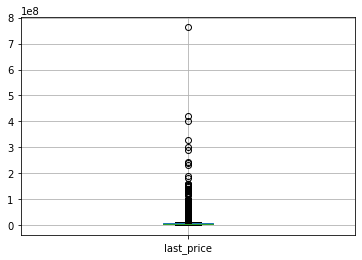

In [35]:
data[['last_price']].boxplot()

На диаграмме видны аномальные выбросы значений в столбце `last_price`. Посмотрим на топ-5 самой дорогой недвижимости в таблице и на характерные значения выборки.

In [36]:
data.sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000,400.0,2017-09-30,7,3.0,10,250.0,10,True,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000,401.0,2016-02-20,5,3.2,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000,190.0,2018-04-04,3,3.5,7,95.0,5,True,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000,618.0,2017-12-18,7,3.4,7,258.0,5,True,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0


In [37]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Среднее арифметическое набора данных больше медианы на ~2.000.000 и стандартное отклонение ~11.000.000 говорит о том, что в данных есть серьёзные аномалии и выбросы, что мы и видим в данных. Квартиры стоимостью 300.000.000 при меданном значении 4.650.000 - это выбивающиеся значения, уникальные предложения на рынке недвижимости. Посмотрим, сколько в наборе данных строк с ценой продажи более 20.000.000 

In [38]:
initial_data_len = len(data)
price_limit = 20000000
print(f"Количество квартир стоимостью более 20.000.000: {len(data.query('last_price > @price_limit'))}")
print(f"Процент таких квартир в наборе данных: {len(data.query('last_price > @price_limit')) / len(data):.0%}")

Количество квартир стоимостью более 20.000.000: 707
Процент таких квартир в наборе данных: 3%


Удалим такие квартиры из набора данных. Снова построим диаграмму размаха и посмотрим характерные значения выборки.

count    2.299200e+04
mean     5.423607e+06
std      3.220160e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

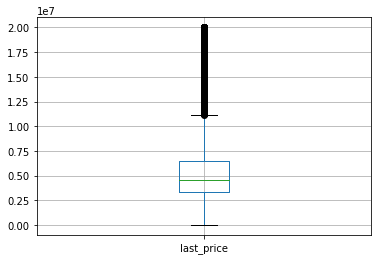

In [39]:
data = data.loc[data['last_price'] <= price_limit]
data[['last_price']].boxplot()
data['last_price'].describe()

Разрыв между средним и медианой уменьшился в 2 раза, а стандартное отклонение отклонение уменьшилось более чем в 3 раза. Оставим данные в столбце в таком виде.

#### 3.4.2. Столбцы total_area, living_area, kitchen_area <a id='areas'> </a>

Рассмотрим диаграммы размаха для столбцов `total_area`, `living_area`, `kitchen_area` и характерные значения столбца `total_area`.

count    22992.000000
mean        56.734944
std         24.810262
min         12.000000
25%         40.000000
50%         51.000000
75%         67.105000
max        460.800000
Name: total_area, dtype: float64

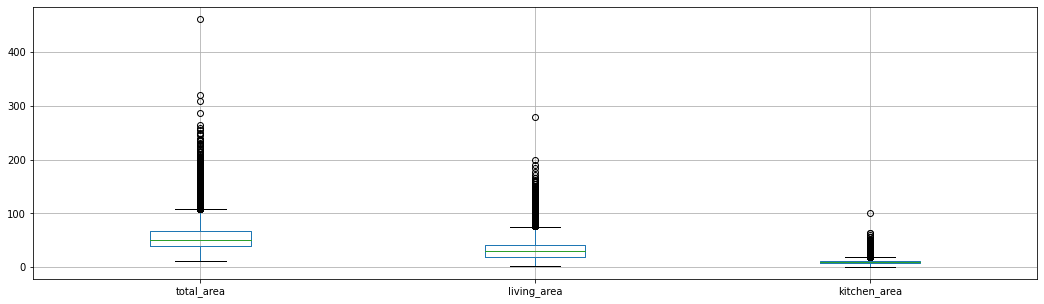

In [40]:
data[['total_area', 'living_area', 'kitchen_area']].boxplot(figsize=(18, 5))
data['total_area'].describe()

В столбце 'total_area' есть выбивающиеся значения, влияющие на набор данных.
Посмотрим сколько квартир в выборке имеют площадь более 200 кв.м и удалим их. Снова построим диаграммы размаха и посмотрим как они изменились для столбцов `total_area`, `living_area`, `kitchen_area`.

Количество квартир площадью более 200 кв.м: 42
Процент таких квартир в наборе данных: 0.2%


count    22950.000000
mean        56.409019
std         23.555763
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64

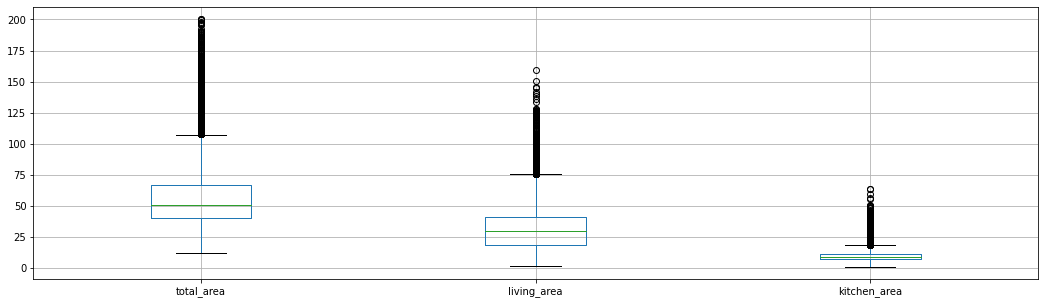

In [41]:
total_area_limit = 200
print(f"Количество квартир площадью более 200 кв.м: {len(data.query('total_area > @total_area_limit'))}")
print(f"Процент таких квартир в наборе данных: {len(data.query('total_area > @total_area_limit')) / len(data):.1%}")
data = data.loc[data['total_area'] <= total_area_limit]
data[['total_area', 'living_area', 'kitchen_area']].boxplot(figsize=(18, 5))
data['total_area'].describe()

Для столбцов `living_area` и `kitchen_area` также удалим выбивающиеся значения. Квартиры с жилой площадью более 80 кв.м и площадью кухни более 20 кв.м являются редкостью, поэтому оставим в наборе данных объекты с жилой площадью менее 80 кв.м и площадью кухни менее 20 кв.м. Выведем на экран характерные значения и диаграммы размаха для столбцов.

Количество квартир с жилой площадью более 80 кв.м: 310
Количество квартир с площадью кухни более 20 кв.м: 669
Процент таких квартир в наборе данных: 4.1%


,total_area,living_area,kitchen_area
count,22016.000000,20243.000000,19839.000000
mean,54.246574,31.137555,9.452901
std,20.144645,13.701548,3.141525
min,12.000000,2.000000,1.300000
25%,39.000000,18.200000,7.000000
50%,50.000000,29.700000,9.000000
75%,65.000000,40.000000,11.000000
max,199.200000,80.000000,20.000000


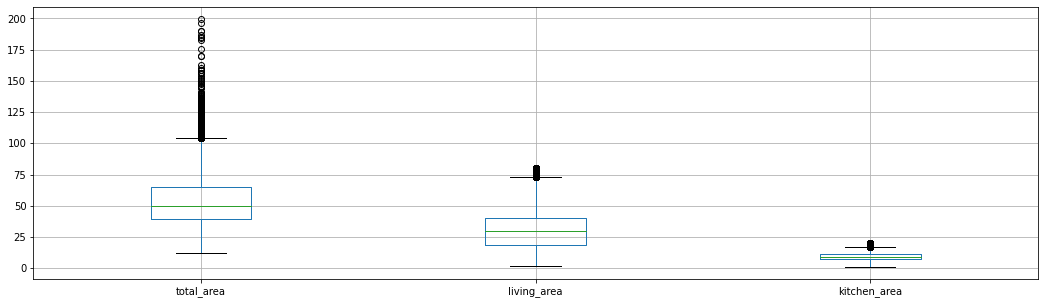

In [42]:
living_area_limit = 80
kitchen_area_limit = 20
print(f"Количество квартир с жилой площадью более 80 кв.м: \
{len(data.query('living_area > @living_area_limit'))}")
print(f"Количество квартир с площадью кухни более 20 кв.м: \
{len(data.query('kitchen_area > @kitchen_area_limit'))}")
print(f"Процент таких квартир в наборе данных: \
{len(data.query('living_area > @living_area_limit or kitchen_area > @kitchen_area_limit')) / len(data):.1%}")
data = data.drop(data[data.living_area > living_area_limit].index)
data = data.drop(data[data.kitchen_area > kitchen_area_limit].index)
data[['total_area', 'living_area', 'kitchen_area']].boxplot(figsize=(18, 5))
data[['total_area', 'living_area', 'kitchen_area']].describe()

Мы устранили редкие и выбивающиеся значения в столбцах `total_area`, `living_area`, `totkitchen_area`. Теперь в этих столбцах среднее и медиана близки, а стандартное отклонение невелико, и данные готовы к дальнейшему анализу.

#### 3.4.3. Столбцы floors_total, floor, rooms, balcony <a id='floors'> </a>  

Построим диаграммы размаха и выведем характерные значения для столбцов `floors_total`, `floor`, `rooms`, `balcony`.

,floors_total,floor,rooms,balcony
count,22016.000000,22016.000000,22016.000000,22016.000000
mean,10.736237,5.903434,1.953261,0.594204
std,6.645753,4.900447,0.916424,0.950958
min,0.000000,1.000000,0.000000,0.000000
25%,5.000000,2.000000,1.000000,0.000000
50%,9.000000,4.000000,2.000000,0.000000
75%,16.000000,8.000000,3.000000,1.000000
max,60.000000,33.000000,7.000000,5.000000


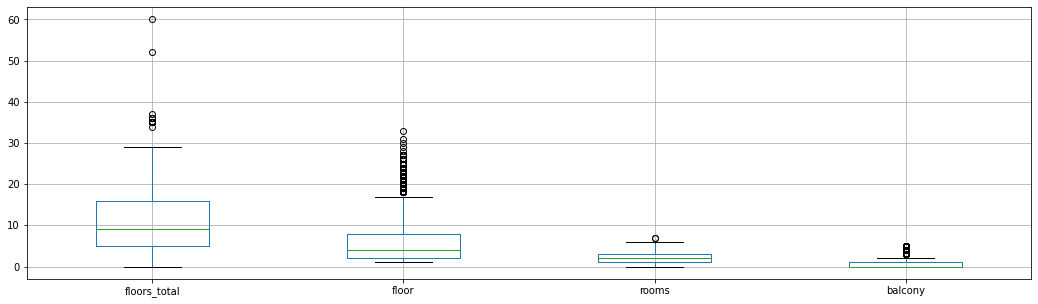

In [43]:
data[['floors_total', 'floor', 'rooms', 'balcony']].boxplot(figsize=(18, 5))
data[['floors_total', 'floor', 'rooms', 'balcony']].describe()

Удалим из выборки объекты с общим количесивом этажей и этажом выше 30 и количеством балконов больше 2, так как это крайне редкие явления для Санкт-Петербурга. Снова выведем на экран характерные значения и диаграммы размаха. Столбец `rooms` трогать не будем, так как в нём нет аномальных значений.

Количество квартир в доме этажностью выше 30 этажей: 25
Количество квартир c количеством балконов больше 2: 487
Процент таких квартир в наборе данных: 2.3%


,floors_total,floor,balcony
count,21505.000000,21505.000000,21505.000000
mean,10.664776,5.859521,0.507510
std,6.585922,4.864116,0.757988
min,0.000000,1.000000,0.000000
25%,5.000000,2.000000,0.000000
50%,9.000000,4.000000,0.000000
75%,16.000000,8.000000,1.000000
max,29.000000,27.000000,2.000000


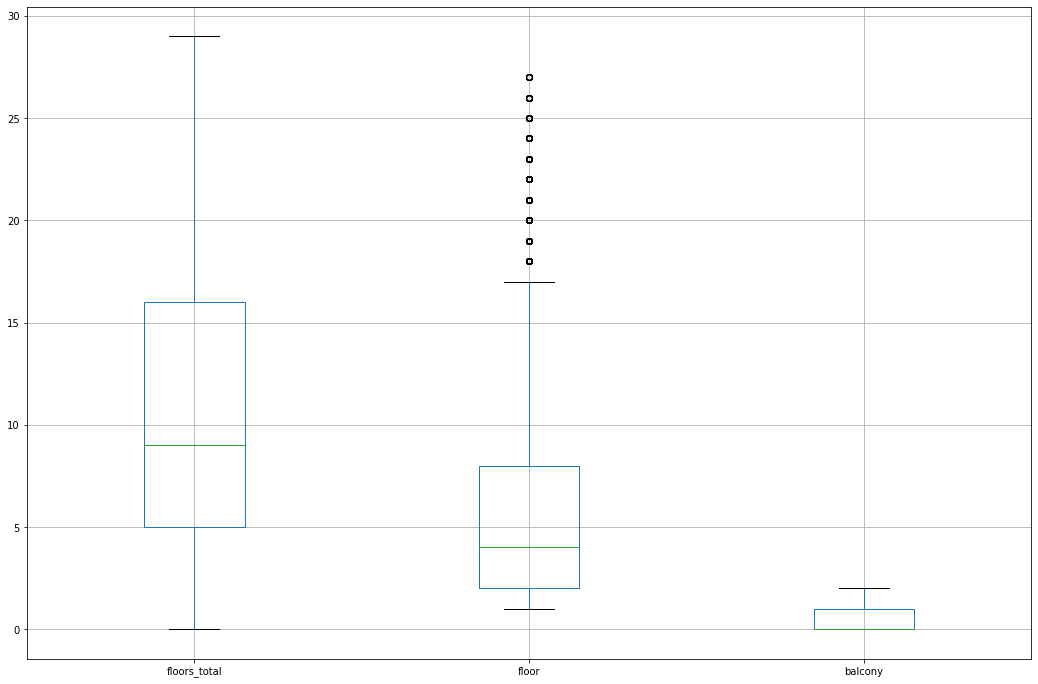

In [44]:
floor_limit = 30
balcony_limit = 2
print(f"Количество квартир в доме этажностью выше 30 этажей: \
{len(data.query('floors_total > @floor_limit or floor > @floor_limit'))}")
print(f"Количество квартир c количеством балконов больше 2: \
{len(data.query('balcony > @balcony_limit'))}")
print(f"Процент таких квартир в наборе данных: \
{len(data.query('floors_total > @floor_limit or floor > @floor_limit or balcony > @balcony_limit')) / len(data):.1%}")
data = data.drop(data[data.floors_total > floor_limit].index)
data = data.loc[data['floor'] <= floor_limit]
data = data.drop(data[data.balcony > balcony_limit].index)
data[['floors_total', 'floor', 'balcony']].boxplot(figsize=(18, 12))
data[['floors_total', 'floor', 'balcony']].describe()

Характерные значения столбцов `floors_total`, `floor` и `balcony` незначительно изменились в лучшую сторону. Оставим данные в таком виде.

#### 3.4.4. Столбец total_images <a id='total_images'> </a>  

,total_images
count,21505.000000
mean,9.683562
std,5.560901
min,0.000000
25%,6.000000
50%,9.000000
75%,14.000000
max,39.000000


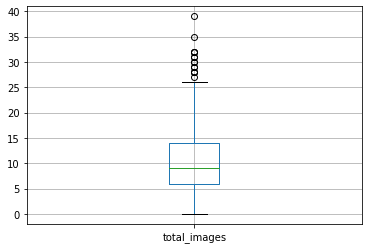

In [45]:
data[['total_images']].boxplot()
data[['total_images']].describe()

Медиана и среднее арифметическое очень близки. Незначительные выбросы не влияют. Оставим столбец без изменений.

#### 3.4.5. Столбец days_exposition <a id='days_exposition'> </a>

,days_exposition
count,18839.000000
mean,174.749987
std,213.769181
min,1.000000
25%,44.000000
50%,92.000000
75%,221.000000
max,1553.000000


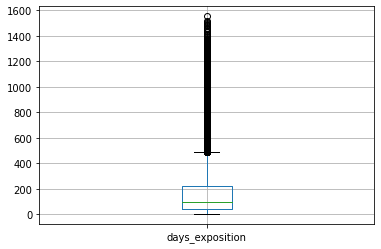

In [46]:
data[['days_exposition']].boxplot()
data[['days_exposition']].describe()

Среднее больше медианы почти в два раза, а стандартное отклонение очень велико. В столбце много аномальных данных. Изучим их природу.

In [47]:
data.query('days_exposition > 500').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
17,6,4180000,36.0,2016-09-09,1,NaN,17,16.5,7,True,...,11.0,1,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
23,11,2950000,32.0,2016-10-29,1,2.6,9,17.7,9,True,...,6.1,0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
43,13,9330000,48.0,2017-01-10,2,3.0,4,28.0,4,True,...,7.5,0,Санкт-Петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763.0
61,18,7990000,74.0,2017-08-24,2,NaN,4,43.0,4,True,...,20.0,0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,NaN,609.0


В данных нет ничего необычного, кроме длительного срока размещения объявления. Скорее всего, это связано с тем, что продавец не снял объявление о продаже сразу после сделки и не отражают реальный срок продажи квартиры. Удалим из датафрейма все строки со сроком размещения объявления более 1 года.

Количество объявлений со сроком размещения более 1 года:     2650
Процент таких квартир в наборе данных:     12.3%


,days_exposition
count,16189.000000
mean,103.274199
std,88.913570
min,1.000000
25%,36.000000
50%,72.000000
75%,151.000000
max,364.000000


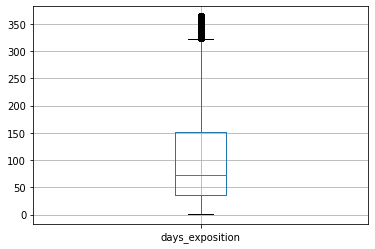

In [48]:
days_exposition_limit = 365
print(f"Количество объявлений со сроком размещения более 1 года: \
    {len(data.query('days_exposition > @days_exposition_limit'))}")
print(f"Процент таких квартир в наборе данных: \
    {len(data.query('days_exposition > @days_exposition_limit')) / len(data):.1%}")
data_filtered = data.drop(data[data.days_exposition > days_exposition_limit].index)
data_filtered[['days_exposition']].boxplot()
display(data_filtered[['days_exposition']].describe())

Характерные значения набора данных улучшились, но мы потеряли 12% данных, что недопустимо. Скорее всего наша гипотеза о том, что люди не снимают объявление о продажи не верна. Посмотрим на данные столбца `days_exposition` повнимательнее. Построим гистограмму.

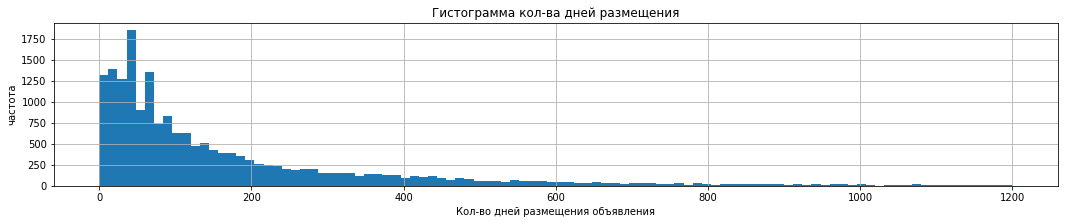

In [49]:
gr = data['days_exposition'].hist(bins=100, range=(0, 1200), figsize=(18, 3))
gr.set_title('Гистограмма кол-ва дней размещения')
gr.set_xlabel('Кол-во дней размещения объявления')
gr.set_ylabel('частота');

Гистограмма выглядит нормально, но присутствуют странные пике в первые 150 дней. Посмотрим их поближе.

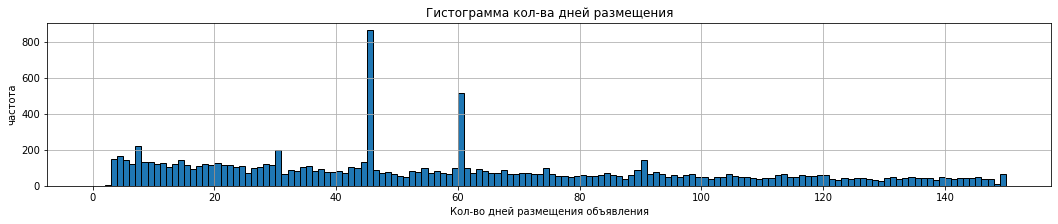

In [50]:
gr = data['days_exposition'].hist(bins=150, range=(0, 150), figsize=(18, 3), ec='black')
gr.set_title('Гистограмма кол-ва дней размещения')
gr.set_xlabel('Кол-во дней размещения объявления')
gr.set_ylabel('частота');

Присутствует мощный пик по снятию объявлений на 45й день, пик поменьше на 60й день. Также есть почти одинаковые пики поменьше на 7ой и 30й день. На сайте Яндекс.Недвижимость (https://yandex.ru/support/realty/owner/home/add-ads-housing.html#concept_ohg_pft_flb) указаны следующие сроки публикации бесплатных объявлений о продаже квартиры:  
- до 4,5 млн — 45 дней  
- от 4,5 до 10 млн — 60 дней
- от 10 млн — 90 дней

Как мы уже видели на диаграмме размаха значений столбца `last_price` с ценами на квартиры, наибольшее количество объявлений относятся к ценовому диапазону от 4 до 6 млн рублей. Соответственно пики по снятию объявлений на 45-й и 60-й день связаны с автоматическим снятием объявления сервисом, то есть они не отражают реальную дату продажи. Строки со значениями столбца `days_exposition` 45 и 60 следует удалить, либо заполнить медианным значением сроков публикации. Но так как данные имеют широкий размах и большое количество аномально больших значений неясной пока природы, корректнее будет удалить срез этих данных, чтобы они не искажали картину реальных сроков продаж, и посмотреть, что получится.

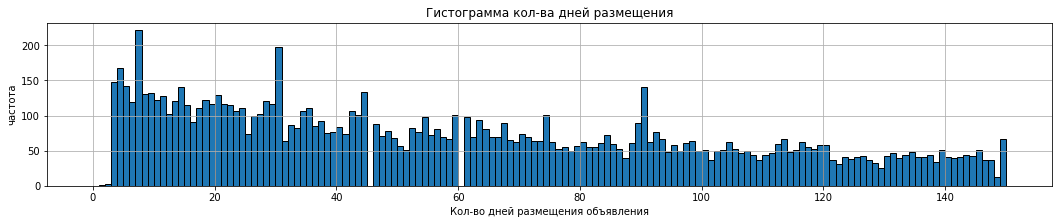

In [51]:
data = data.loc[data['days_exposition'] != 45.00000000000001]
data = data.loc[data['days_exposition'] != 60]
gr = data['days_exposition'].hist(bins=150, range=(0, 150), figsize=(18, 3), ec='black')
gr.set_title('Гистограмма кол-ва дней размещения')
gr.set_xlabel('Кол-во дней размещения объявления')
gr.set_ylabel('частота');

Объявления, снятые автоматически на 45й и 60й день, были удалены из набора данных. Для пиков по снятию объявлений на 7ой и 30ой день объяснения не нашлось.

#### 3.4.6. Столбцы airports_nearest, cityCenters_nearest <a id='airports'> </a> 

Построим диаграммы размаха и выведем характерные значения для этих столбцов.

,airports_nearest,cityCenters_nearest
count,15331.000000,15347.000000
mean,28792.607788,14630.839643
std,12866.048867,8516.692324
min,6450.000000,208.000000
25%,18090.000000,10186.000000
50%,26832.000000,13355.000000
75%,37434.000000,16478.000000
max,84869.000000,65968.000000


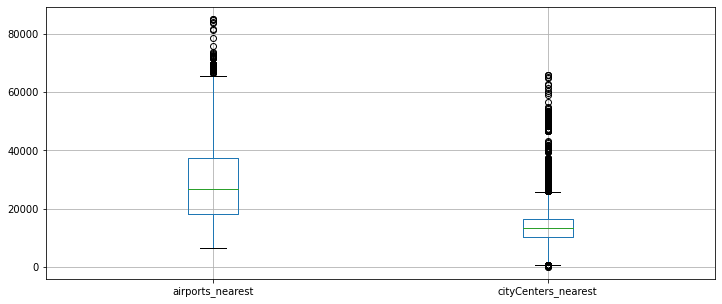

In [52]:
data[['airports_nearest', 'cityCenters_nearest']].boxplot(figsize=(12, 5))
data[['airports_nearest', 'cityCenters_nearest']].describe()

Среднее арифметическое и медиана близки. Оставим эти данные без изменений.

#### 3.4.7. Столбцы parks_nearest, ponds_nearest <a id='parks'> </a>

Построим диаграммы размаха и выведем характерные значения для этих столбцов.

,parks_nearest,ponds_nearest
count,6580.000000,7447.000000
mean,493.923252,527.832819
std,340.006336,275.861282
min,1.000000,13.000000
25%,292.000000,311.000000
50%,458.000000,513.000000
75%,615.000000,733.000000
max,3190.000000,1344.000000


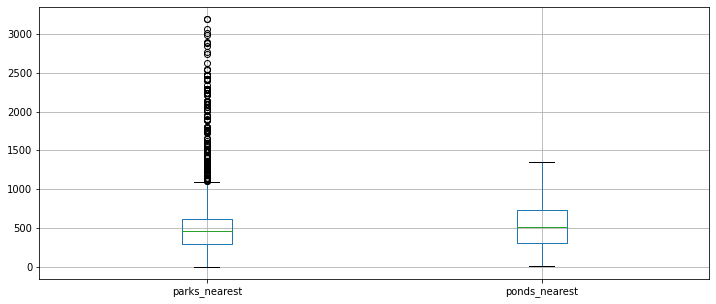

In [53]:
data[['parks_nearest', 'ponds_nearest']].boxplot(figsize=(12, 5))
data[['parks_nearest', 'ponds_nearest']].describe()

В этих данных тоже нет ничего необычного. Оставим их без изменений.

#### 3.4.8. Столбцы parks_around3000, ponds_around3000 <a id='parks3000'> </a> 

Построим диаграммы размаха и выведем характерные значения для этих столбцов.

,parks_around3000,ponds_around3000
count,15348.000000,15348.000000
mean,0.576753,0.724133
std,0.774613,0.903573
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


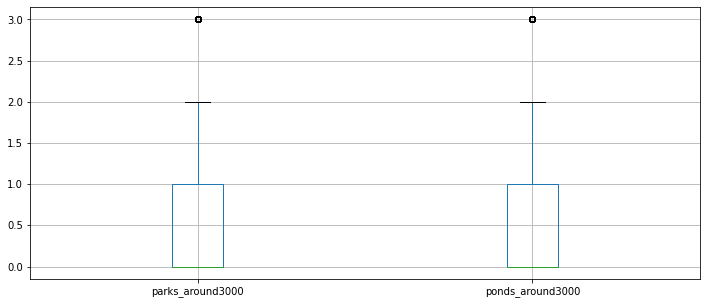

In [54]:
data[['parks_around3000', 'ponds_around3000']].boxplot(figsize=(12, 5))
data[['parks_around3000', 'ponds_around3000']].describe()

В диаграммах размаха есть выброс по значению 3 по обоим столбцам. Интересно, сколько таких квартир, где в радиусе 3 км есть 3 парка, 3 пруда или и то, и другое вместе.

In [55]:
print(f"Количество квартир с 3-мя парками в радиусе 3 км: {len(data.query('parks_around3000 == 3'))}")
print(f"Количество квартир с 3-мя прудами в радиусе 3 км: {len(data.query('ponds_around3000 == 3'))}")
print(f"Количество квартир с 3-мя парками и прудами в радиусе 3 км: {len(data.query('parks_around3000 == 3 and ponds_around3000 == 3'))}")

Количество квартир с 3-мя парками в радиусе 3 км: 455
Количество квартир с 3-мя прудами в радиусе 3 км: 1065
Количество квартир с 3-мя парками и прудами в радиусе 3 км: 162


В этих данных нет ничего необычного, такое вполне возможно. Оставим эти данные без изменений.

#### 3.4.9. Столбец first_day_exposition <a id='first_day_exposition'> </a> 

Проверим, что в столбце `first_day_exposition` нет аномальных значений дат, например, из далёкого прошлого или будущего. Выведем на экран максимальное и минимальное значения диапазона дат.

In [56]:
print(f"Минимальное значение в столбце 'first_day_exposition': {data['first_day_exposition'].unique().min()}")
print(f"Максимальное значение в столбце 'first_day_exposition': {data['first_day_exposition'].unique().max()}")

Минимальное значение в столбце 'first_day_exposition': 2014-11-27T00:00:00.000000000
Максимальное значение в столбце 'first_day_exposition': 2019-05-03T00:00:00.000000000


Данные в этом столбце в полном порядке.

#### 3.4.10. Столбец ceiling_height <a id='ceiling_height'> </a>

Выведем на экран диаграммы размаха и характерные значения столбца `ceiling_height`.

,ceiling_height
count,12985.000000
mean,2.736062
std,0.942418
min,1.000000
25%,2.500000
50%,2.640000
75%,2.770000
max,32.000000


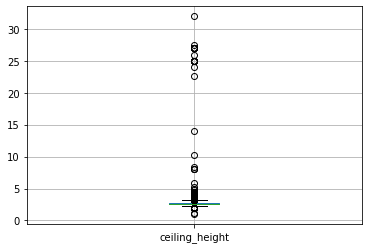

In [57]:
data[['ceiling_height']].boxplot()
data[['ceiling_height']].describe()

В данных присутствуют аномальные значения высоты потолков. Выведем на экран список всех знаений и отсортируем от большего к меньшему

In [58]:
print(sorted(data['ceiling_height'].unique(), reverse=True))

[nan, 32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6, 14.0, 10.3, 8.3, 8.0, 5.8, 5.3, 5.0, 4.8, 4.5, 4.4, 4.37, 4.3, 4.25, 4.2, 4.19, 4.15, 4.14, 4.1, 4.06, 4.0, 3.98, 3.95, 3.93, 3.9, 3.88, 3.85, 3.84, 3.8, 3.78, 3.75, 3.7, 3.67, 3.66, 3.65, 3.63, 3.62, 3.6, 3.59, 3.57, 3.56, 3.55, 3.54, 3.53, 3.52, 3.5, 3.49, 3.48, 3.47, 3.46, 3.45, 3.44, 3.42, 3.4, 3.39, 3.38, 3.37, 3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3, 3.29, 3.28, 3.27, 3.26, 3.25, 3.24, 3.23, 3.22, 3.21, 3.2, 3.18, 3.17, 3.16, 3.15, 3.14, 3.13, 3.12, 3.11, 3.1, 3.09, 3.08, 3.07, 3.06, 3.05, 3.04, 3.03, 3.02, 3.01, 3.0, 2.99, 2.98, 2.97, 2.96, 2.95, 2.94, 2.93, 2.92, 2.91, 2.9, 2.89, 2.88, 2.87, 2.86, 2.85, 2.84, 2.83, 2.82, 2.81, 2.8, 2.79, 2.78, 2.77, 2.76, 2.75, 2.74, 2.73, 2.72, 2.71, 2.7, 2.69, 2.68, 2.67, 2.66, 2.65, 2.64, 2.63, 2.62, 2.61, 2.6, 2.59, 2.58, 2.57, 2.56, 2.55, 2.54, 2.53, 2.52, 2.51, 2.5, 2.49, 2.48, 2.47, 2.46, 2.45, 2.4, 2.3, 2.0, 1.2, 1.0]


Значения высоты потолков в диапазоне от 2 до 8.3 метра выглядят реалистичными. Их мы трогать не будем. Посмотрим на объекты, которые имеют высоту потолков 1, 1.2, 10.3, 14 метров.

In [59]:
data.query('ceiling_height in [1, 1.2, 10.3, 14]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.2,2,27.5,1,True,...,5.2,0,посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,True,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.5,15,True,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000,55.0,2018-10-31,2,1.0,12,32.4,7,True,...,10.0,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Квартира в посёлке Мга на 1 этаже с высотой потолка 1.2 метра выглядит аномалией. Удалим строку с этим значением из датасета.

In [60]:
data = data.loc[data['ceiling_height'] != 1.2]

Квартира в Санкт-Петербурге на 5ом этаже 14ти этажного дома с высотой потолка 14 метров вряд ли существует. Скорее всего продавец ошибочно внёс количество этажей в поле для высоты потолков, так как эти значения совпадают. Посмотрим, продаются ли в этом же доме другие квартиры. Найдём другие объекты с таким же значением расстояния до центра города `cityCenters_nearest` = 13610 и аэропорта `airports_nearest` = 14814.

In [61]:
data.query('cityCenters_nearest == 13610 and airports_nearest == 14814')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,True,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
18484,9,5500000,50.5,2018-02-26,2,NaN,15,31.0,14,True,...,8.0,0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,32.0


Отлично, похоже в этом же доме продаётся ещё одна квартира. Имеющиеся картографические данные полностью совпадают. Но к сожалению, продавец объекта не указал высоту потолоков, так что мы так и не знаем какой высоты потолки в этом доме. Удалим из датафрейма строку со значением `ceiling_height` = 14.

In [62]:
data = data.loc[data['ceiling_height'] != 14]

Квартира в Санкт-Петербурге стоимостью 6.000.000, площадью в 55 кв.м. на седьмом этаже 12ти этажного дома с высотой потолка в 1 метр также вряд ли существует. Больше похоже на ошибку при вводе. Проверим, продаются ли другие квартиры в этом же доме.

In [63]:
data.query('cityCenters_nearest == 14217 and airports_nearest == 33053')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10378,9,6500000,78.0,2017-08-29,3,2.7,12,48.0,6,False,...,15.0,1,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,97.0
15420,8,4500000,38.6,2019-03-31,1,2.7,12,20.1,2,False,...,10.1,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,29.0
22590,16,6000000,55.0,2018-10-31,2,1.0,12,32.4,7,True,...,10.0,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


В наборе данных есть объявления о продаже ещё двух квартир в этом же доме, и в одном объявлении указана высота потолков - 2.7 м. Заменим некорректное значение высоты потолков 1 м на 2.7 метра.

In [64]:
data['ceiling_height'] = data['ceiling_height'].replace(1, 2.7)

Проделаем тоже самое для квартиры с высотой потолков 10.3 м.

In [65]:
data.query('cityCenters_nearest == 11936 and airports_nearest == 36353')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1207,14,7300000,70.2,2016-03-23,2,2.77,16,38.0,12,False,...,11.0,2,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,553.0
10772,8,5200000,41.0,2018-08-28,1,2.80,16,18.0,7,True,...,10.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,13.0
12770,8,5300000,47.0,2017-06-28,1,2.80,16,20.0,4,True,...,10.5,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,135.0
16892,16,7850000,52.0,2018-08-29,1,2.50,15,20.2,13,True,...,14.6,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,NaN
19351,14,8700000,69.0,2016-03-30,2,2.77,16,37.0,11,True,...,10.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,276.0
19531,18,8600000,73.0,2018-11-21,2,2.75,16,41.0,2,True,...,11.0,2,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,105.0
20142,16,5300000,45.8,2017-10-25,1,2.77,16,20.2,9,True,...,10.4,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,29.0
22309,20,5300000,45.0,2017-09-30,1,10.30,16,15.5,15,True,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


Данные по высоте потолка в одном и том же доме отличаются. Это странно. Значение 2.8 м кажется вполне реалистичным. Заменим некорректное значение высоты потолков 10.3 м на 2.8 метра.

In [66]:
data['ceiling_height'] = data['ceiling_height'].replace(10.3, 2.8)

Теперь рассмотрим оставшиеся аномально большие значения высоты потолков в диапазоне значений от 22.6 до 32 метров. Проверим гипотезу, что продавец не поставил точку между двумя цифрами или поставил её в числе не в том месте. Посмотрим, есть ли объявления о продаже квартир в тех же домах, где указаны аномально высокие потолки.

In [67]:
for ceiling_height in [32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6]:
    display(data.loc[(data['cityCenters_nearest'] == data.loc[data['ceiling_height'] == ceiling_height, 'cityCenters_nearest'].reset_index(drop=True)[0]) &
            (data['airports_nearest'] == data.loc[data['ceiling_height'] == ceiling_height, 'airports_nearest'].reset_index(drop=True)[0])])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4088,10,4500000,39.0,2018-04-02,1,NaN,26,17.00,7,True,...,9.00,0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,180.0
13951,10,4900000,36.5,2018-10-10,1,2.75,24,11.47,23,True,...,15.90,0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,24.0
16114,16,6490000,57.0,2018-06-29,2,NaN,25,28.30,13,False,...,9.16,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,41.0
21110,20,6690000,54.0,2018-09-10,2,NaN,24,30.00,18,True,...,11.00,0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,139.0
21377,19,4900000,42.0,2017-04-18,1,27.50,24,37.70,19,False,...,11.00,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,True,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12247,10,7800000,75.61,2018-04-04,3,NaN,14,45.82,1,True,...,9.77,0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,277.0
20507,12,5950000,60.00,2018-02-19,2,22.6,14,35.00,11,True,...,13.00,1,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0


Ура, в доме с квартирой, где указана высота потолка 27.5 метров продаются и другие квартиры, и в одной из них высота указана 2.75 метра. Гипотеза, что продавец поставил точку в числе не туда подтверждается. Заменим значения 32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6 на 3.20, 2.75, 2.70, 2.60, 2.50, 2.40, 2.26 соответственно.

In [68]:
def replace_ceiling_height(ceiling_height):
    if ceiling_height in [32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6]:
        return ceiling_height / 10
    return ceiling_height
data['ceiling_height'] = data['ceiling_height'].apply(replace_ceiling_height)

Проверим, как изменились диаграмма размаха и характерные значения для столбца `ceiling_height`

,ceiling_height
count,12983.000000
mean,2.700476
std,0.260107
min,2.000000
25%,2.500000
50%,2.640000
75%,2.770000
max,8.300000


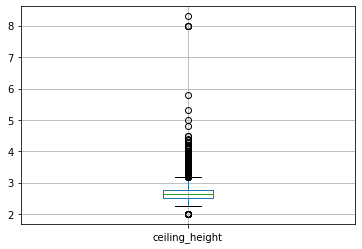

In [69]:
data[['ceiling_height']].boxplot()
data[['ceiling_height']].describe()

Отлично, медиана и среднее сблизились, а стандартное отклонение уменьшилось в 3.75 раза.

#### 3.4.11. Выводы <a id='conclusions_3_4'> </a> 

In [70]:
print(f'В результате обработки аномальных значений было удалено {initial_data_len - len(data)} строк из датафрейма, \
что составляет {(initial_data_len - len(data)) / initial_data_len:.1%} от исходного набора данных')

В результате обработки аномальных значений было удалено 3576 строк из датафрейма, что составляет 15.1% от исходного набора данных


Данные в таблицы были обработаны следующим образом:  
- удалены данные о квартирах:  
    * стоимостью > 20.000.000 рублей (столбец `last_price`, 707 строк удалено);  
    * общей площадью > 200 кв.м (столбец `total_area`, 42 строки удалено);  
    * с жилой площадью > 80 кв.м. (столбец `living_area`, 3 строки удалено);  
    * с площадью кухни > 20 кв.м. (столбец `kitchen_area`, 425 строк удалено);  
    * в домах с этажностью более 30 этажей (столбцы `floors_total`, `floor`, 22 строки удалено);
    * c количеством балконов более 2 (столбец `balcony`, 450 строк удалено)
    * со сроком размещения объявления 45 и 60 дней (столбец `days_exposition`, 1370 строки удалено);  
    * c высотой потолка 1.2 и 14 м (столбец `ceiling_height`, 2 строки удалено);  
- заменены данные о квартирах: 
    * с высотой потолка 32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6 на 3.20, 2.75, 2.70, 2.60, 2.50, 2.40, 2.26 соответственно (столбец `ceiling_height`).

Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях в выбранных параметрах о продаже квартир.

In [71]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,123.00","20,123.00","12,983.00","17,457.00","20,123.00","18,894.00","18,481.00","20,123.00","20,123.00"
min,0.00,12.00,2.00,1.00,"430,000.00",2.00,1.30,1.00,0.00
max,7.00,199.20,8.30,"1,553.00","20,000,000.00",80.00,20.00,27.00,28.00


In [72]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20123 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20123 non-null  int64         
 1   last_price            20123 non-null  int64         
 2   total_area            20123 non-null  float64       
 3   first_day_exposition  20123 non-null  datetime64[ns]
 4   rooms                 20123 non-null  int64         
 5   ceiling_height        12983 non-null  float64       
 6   floors_total          20123 non-null  int64         
 7   living_area           18894 non-null  float64       
 8   floor                 20123 non-null  int64         
 9   is_apartment          20123 non-null  bool          
 10  studio                20123 non-null  bool          
 11  open_plan             20123 non-null  bool          
 12  kitchen_area          18481 non-null  float64       
 13  balcony         

### 3.5. Добавление новых столбцов <a id='add_new_columns'> </a>

* Добавим столбец с ценой одного квадратного метра квартиры

In [73]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype(int)

* Добавим столбец c днём недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [74]:
data['first_wkday_exposition'] = data['first_day_exposition'].dt.weekday

* Добавим столбец с месяцем публикации объявления

In [75]:
data['first_month_exposition'] = data['first_day_exposition'].dt.month

* Добавим столбец c годом публикации объявления

In [76]:
data['first_year_exposition'] = data['first_day_exposition'].dt.year

* Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [77]:
def add_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(add_floor_type, axis=1)

* Добавим столбец c расстоянием до центра города в километрах

In [78]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

**Результат:** проверим наличие новых столбцов в таблице

In [79]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,first_wkday_exposition,first_month_exposition,first_year_exposition,floor_type,cityCenters_nearest_km
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,True,...,NaN,0.0,NaN,155.0,99195,3,11,2017,другой,19.0
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,True,...,NaN,0.0,NaN,NaN,110544,3,4,2019,другой,12.0


## 4. Исследовательский анализ данных <a id='research'> </a>

### 4.1. Изучение параметров объектов <a id='parameters'> </a>

#### 4.1.1. Общая площадь <a id='par_total_area'> </a>

count    20123.000000
mean        54.066265
std         20.214610
min         12.000000
25%         39.000000
50%         49.700000
75%         64.615000
max        199.200000
Name: total_area, dtype: float64

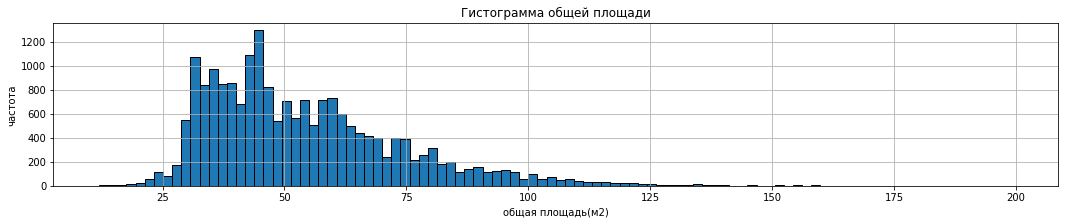

In [80]:
display(data['total_area'].describe())
gr = data['total_area'].hist(bins=100, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма общей площади')
gr.set_xlabel('общая площадь(м2)')
gr.set_ylabel('частота');

Общая площадь в нашей выборке колеблется от 12 до 200 кв.м., среднее значение 48, а медиана 51 кв.м. Больше всего предложений по квартирам общей площадью от 30 до 45 кв. м. Далее с увеличением площади количество предложений уменьшается. Распределение значений близко к нормальному.

#### 4.1.2. Жилая площадь <a id='par_living_area'> </a> 

count    18894.000000
mean        30.984033
std         13.699757
min          2.000000
25%         18.100000
50%         29.500000
75%         40.000000
max         80.000000
Name: living_area, dtype: float64

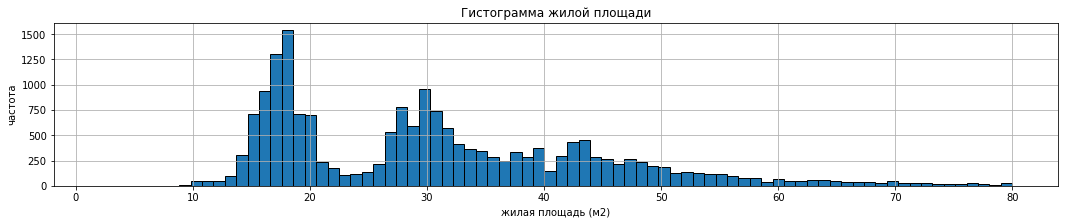

In [81]:
display(data['living_area'].describe())
gr = data['living_area'].hist(bins=80, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма жилой площади')
gr.set_xlabel('жилая площадь (м2)')
gr.set_ylabel('частота');

Распределение значений жилой площади имеет несколько пиков: явно выражены два диапазона. Больше всего квартир с жилой площадью в диапазоне 16-18 кв.м и 27-33 кв.м. Распределение как будто состоит из трёх нормальных распределений. Вероятно, это связано с разными типами застройки.

#### 4.1.3. Площадь кухни <a id='par_kitchen_area'> </a>

count    18481.000000
mean         9.414047
std          3.130125
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         20.000000
Name: kitchen_area, dtype: float64

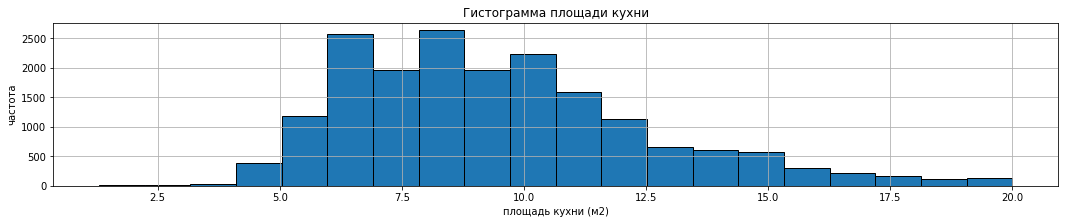

In [82]:
display(data['kitchen_area'].describe())
gr = data['kitchen_area'].hist(bins=20, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма площади кухни')
gr.set_xlabel('площадь кухни (м2)')
gr.set_ylabel('частота');

Площадь кухни имеет нормальное распределение значений. Среднее значение по выборке - 9 кв.м.

#### 4.1.4. Цена объекта <a id='par_last_price'> </a>

count    2.012300e+04
mean     5.148109e+06
std      2.842613e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.495000e+06
75%      6.200000e+06
max      2.000000e+07
Name: last_price, dtype: float64

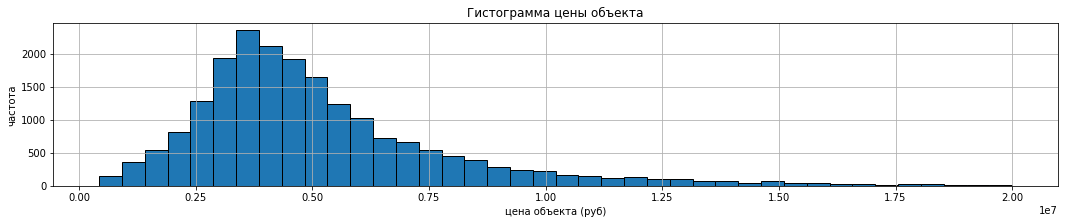

In [83]:
display(data['last_price'].describe())
gr = data['last_price'].hist(bins=40, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма цены объекта')
gr.set_xlabel('цена объекта (руб)')
gr.set_ylabel('частота');

Цена объекта имеет нормальное распределение значений. Большинство значений лежит в диапазоне от 3 до 6 млн.

#### 4.1.5. Количество комнат <a id='par_rooms'> </a>

count    20123.00000
mean         1.94638
std          0.91805
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          7.00000
Name: rooms, dtype: float64

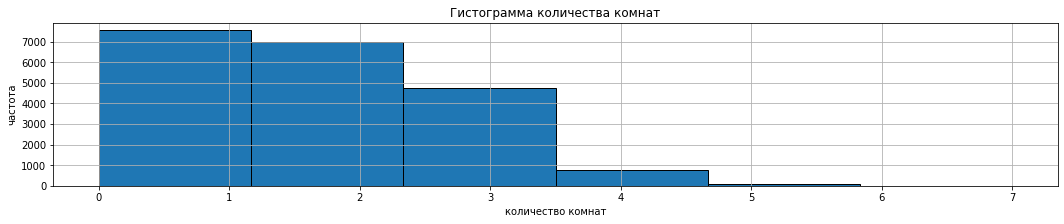

In [84]:
display(data['rooms'].describe())
gr = data['rooms'].hist(bins=6, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма количества комнат')
gr.set_xlabel('количество комнат')
gr.set_ylabel('частота');

In [85]:
studio_data = data.pivot_table(index='rooms', values='studio', aggfunc=['count', 'sum', 'mean'])
studio_data.index.name = 'кол-во комнат'
studio_data.columns = ['кол-во квартир', 'кол-во студий', 'доля студий']
studio_data['доля студий'] = studio_data['доля студий'].round(3)
studio_data

,кол-во квартир,кол-во студий,доля студий
кол-во комнат,,,
0,180,133,0.739
1,7357,6,0.001
2,6957,0,0.000
3,4746,0,0.000
4,771,0,0.000
5,100,0,0.000
6,10,0,0.000
7,2,0,0.000


В датафреймк присутствует 180 квартир с количеством комнат равным 0, 133 из них студии. Скорее всего все эти объекты - студии. Из сводной таблицы видно, что нет тенденции называть студии 1-комнатными квартирами (всего 6 значений из 7352). Значит на продажу выставляется очень мало студий. Видимо, их покупают на этапе строительства и держат в собственности для сдачи в аренду. Больше всего предложений о продаже 1-комнатных, 2-х комнатных квартир и 3-х комнатных квартир. С увеличением количества комнат количество объявления уменьшается.

#### 4.1.6. Высота потолка <a id='par_ceiling_height'> </a>

count    12983.000000
mean         2.700476
std          0.260107
min          2.000000
25%          2.500000
50%          2.640000
75%          2.770000
max          8.300000
Name: ceiling_height, dtype: float64

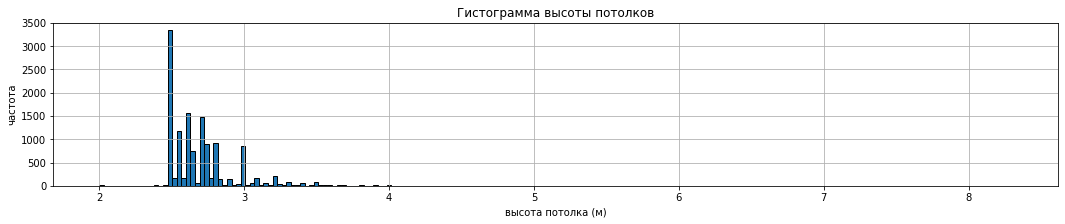

In [86]:
display(data['ceiling_height'].describe())
gr = data['ceiling_height'].hist(bins=200, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма высоты потолков')
gr.set_xlabel('высота потолка (м)')
gr.set_ylabel('частота');

Средняя высота потолков 2.6 метра. Минимальная высота - 1.2 м, максимальная 8.3 м. Данные вполне реалистичные.

#### 4.1.7. Этаж квартиры <a id='par_floor'> </a>

count    20123.000000
mean         5.849128
std          4.843346
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

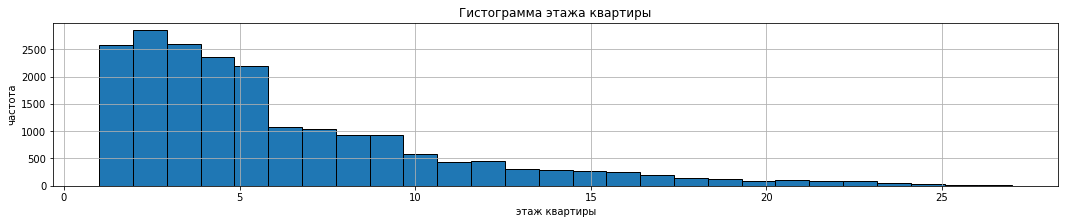

In [87]:
display(data['floor'].describe())
gr = data['floor'].hist(bins=27, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма этажа квартиры')
gr.set_xlabel('этаж квартиры')
gr.set_ylabel('частота');

Похоже, больше всего квартир продают в пятиэтажках. Наверное, чтобы купить в ипотеку квартиру в спальном районе на 20-ом этаже. С увеличением этажности количество предложений о продаже также уменьшается. Интересная статистика.

#### 4.1.8. Тип этажа квартиры («первый», «последний», «другой») <a id='par_floor_type'> </a>

count      20123
unique         3
top       другой
freq       14753
Name: floor_type, dtype: object

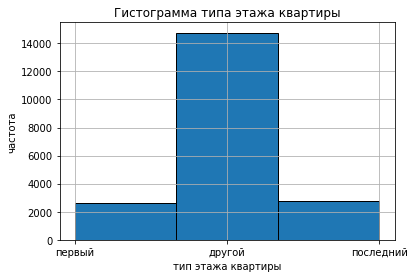

In [88]:
display(data['floor_type'].describe())
gr = data['floor_type'].hist(bins=3, ec='black')
gr.set_title('Гистограмма типа этажа квартиры')
gr.set_xlabel('тип этажа квартиры')
gr.set_ylabel('частота');

Количество предложений о продаже на первом и последнем этаже одинаковы.

#### 4.1.9. Общее количество этажей в доме <a id='par_floors_total'> </a>

count    20123.000000
mean        10.641356
std          6.555379
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

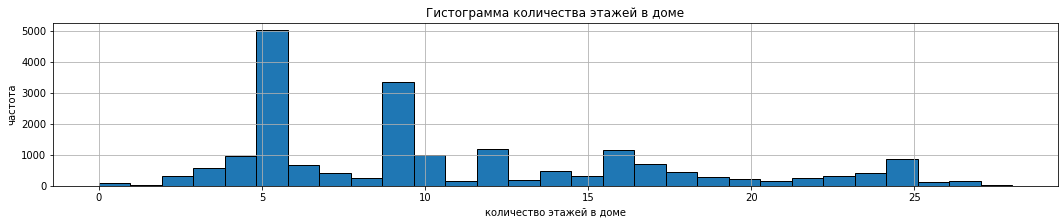

In [89]:
display(data['floors_total'].describe())
gr = data['floors_total'].hist(bins=29, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма количества этажей в доме')
gr.set_xlabel('количество этажей в доме')
gr.set_ylabel('частота');

Да, как мы и предполагали, наибольшее количество предложений о продаже квартир в пятиэтажках и девятиэтажках.

#### 4.1.10. Расстояние до центра города в метрах <a id='par_cityCenters_nearest'> </a>

count    15346.000000
mean     14630.906164
std       8516.965839
min        208.000000
25%      10186.000000
50%      13355.000000
75%      16478.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

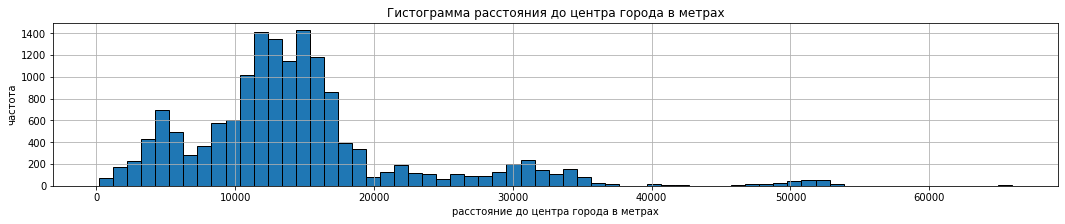

In [90]:
display(data['cityCenters_nearest'].describe())
gr = data['cityCenters_nearest'].hist(bins=65, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма расстояния до центра города в метрах')
gr.set_xlabel('расстояние до центра города в метрах')
gr.set_ylabel('частота');

В основном продают квартиры, расположенные в радиусе 10.5-16.5 км от центра Санкт-Петербурга, второй пик - квартиры в радиусе 5 км от центра, есть предложения в радиусе 20-30 км, ну и 40-50 км - это ближайшие пригороды.

#### 4.1.11. Расстояние до ближайшего аэропорта <a id='par_airports_nearest'> </a>

count    15330.000000
mean     28793.519635
std      12865.973118
min       6450.000000
25%      18090.000000
50%      26833.500000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

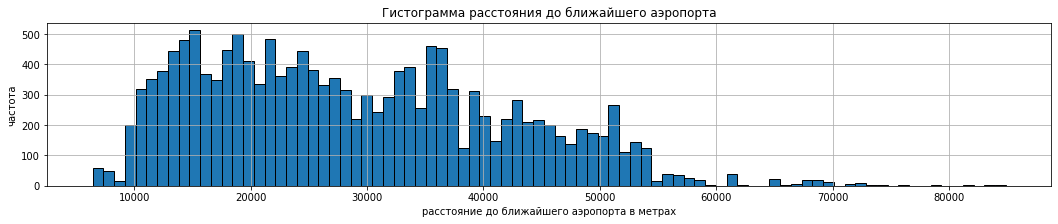

In [91]:
display(data['airports_nearest'].describe())
gr = data['airports_nearest'].hist(bins=85, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма расстояния до ближайшего аэропорта')
gr.set_xlabel('расстояние до ближайшего аэропорта в метрах')
gr.set_ylabel('частота');

Среднее значение - 29 км до аэропорта. Не похоже, что чем ближе к ажропорту, тем больше людей хотят продать свои квартиры.

#### 4.1.12. Расстояние до ближайшего парка <a id='par_parks_nearest'> </a> 

count    6580.000000
mean      493.923252
std       340.006336
min         1.000000
25%       292.000000
50%       458.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

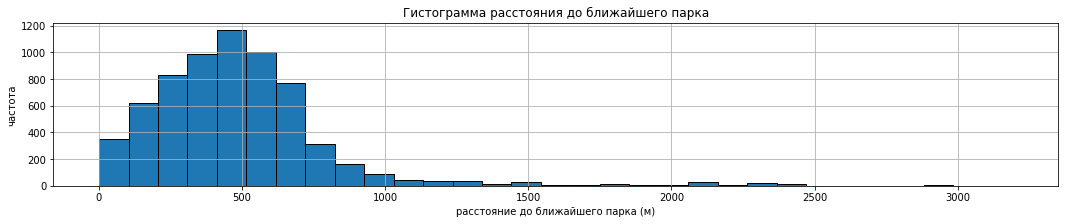

In [92]:
display(data['parks_nearest'].describe())
gr = data['parks_nearest'].hist(bins=31, ec='black', figsize=(18, 3))
gr.set_title('Гистограмма расстояния до ближайшего парка')
gr.set_xlabel('расстояние до ближайшего парка (м)')
gr.set_ylabel('частота');

Здесь мы видим нормальное распределение. Среднее расстояние от продаваемых квартир до ближайшего парка - 500 м.

#### 4.1.13. День и месяц публикации объявления <a id='par_day_month_of_exposition'> </a>

,first_wkday_exposition,first_month_exposition
count,20123.000000,20123.000000
mean,2.562640,6.416687
std,1.783922,3.470817
min,0.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,6.000000
75%,4.000000,10.000000
max,6.000000,12.000000


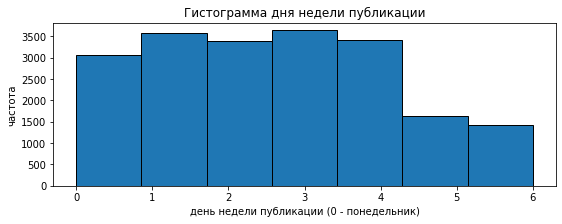

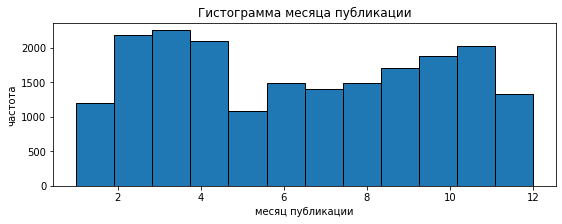

In [93]:
display(data[['first_wkday_exposition', 'first_month_exposition']].describe())
gr = data['first_wkday_exposition'].plot(kind='hist', bins=7, ec='black', figsize=(9, 3));
gr.set_title('Гистограмма дня недели публикации')
gr.set_xlabel('день недели публикации (0 - понедельник)')
gr.set_ylabel('частота');
plt.show()
gr = data['first_month_exposition'].plot(kind='hist', bins=12, ec='black', figsize=(9, 3));
gr.set_title('Гистограмма месяца публикации')
gr.set_xlabel('месяц публикации')
gr.set_ylabel('частота');

Больше всего публикаций делается в будние дни, причем из будних дней меньше всего в понедельник. Понедельник - день тяжелый. В выходные дни подается в два раза меньше объявлений, чем в будний день.  
Больше всего объявлений публикуются с февраля по апрель, затем майские праздники, лето - провал, и число публикаций растёт с середины лета до ноября. А в декабре-январе снова спад из-за новогодних праздников.
Скорее всего половина объявлений о продаже квартир подаётся агентами по недвижимости, которые по выходным и праздникам не работают.

#### 4.1.14. Время продажи квартиры <a id='par_days_of_exposition'> </a>

count    17457.000000
mean       184.550438
std        219.078432
min          1.000000
25%         40.000000
50%        104.000000
75%        239.000000
max       1553.000000
Name: days_exposition, dtype: float64

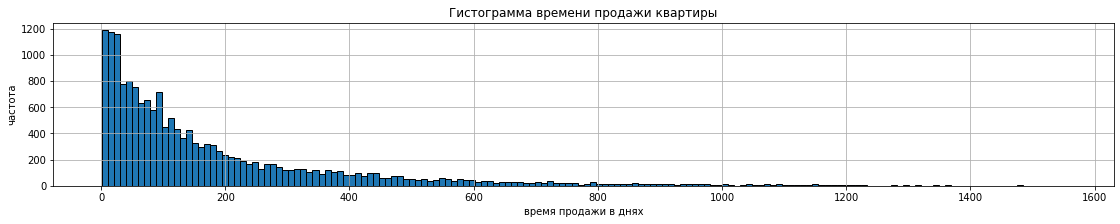

In [94]:
display(data['days_exposition'].describe())
gr = data['days_exposition'].hist(bins=160, ec='black', figsize=(19, 3))
gr.set_title('Гистограмма времени продажи квартиры')
gr.set_xlabel('время продажи в днях')
gr.set_ylabel('частота');

В разделе [2.4.5](#days_exposition) мы уже рассматривали подробно этот параметр и удалили выбросы в данных о продажах на 45ый и 60ый день, не отражавшие реальную картину времени продажи квартиры. По обработанным данным можно сказать, что среднее время продажи квартиры - 181 день, медианное время - 103 дня. Самая быстрая продажа - за 1 день. Продажу за 40 дней можно считать быстрой и удачной, так как только четверть квартир продаётся с такой скоростью. Сроки продажи квартиры от 40 до 234 дней можно назвать стандартными. Долгой продажу можно считать более 235 дней. Медиану и стандартное отклонение задирают вверх аномально большие значения времени продажи до 4 лет. С чем они связаны пока не понятно. Посмотрим, как зависит среднее время продажи от года публикации.

In [95]:
days_exposition_by_year_of_exposition = data.pivot_table(index='first_year_exposition', values='days_exposition', aggfunc=['count', 'mean', 'median'])
days_exposition_by_year_of_exposition.index.name = 'год публикации'
days_exposition_by_year_of_exposition.columns = ['кол-во публикаций', 'среднее время продажи', 'медианное время продажи']
days_exposition_by_year_of_exposition

,кол-во публикаций,среднее время продажи,медианное время продажи
год публикации,,,
2014,86,907.430233,872.5
2015,979,639.045965,566.0
2016,2384,327.131711,246.0
2017,6759,162.303891,111.0
2018,6314,97.251029,72.0
2019,935,28.978610,21.0


Из сводной таблицы видно, что время продажи уменьшается с каждым годом. Видимо, кризис 2014 года сильно охладил рынок недвижимости так, что квартиры, выставленные на продажу в 2014-2016 годах удалось продать только в 2017-2018 годах. Значит, аномально большие сроки продажи действительно отражают реальную ситуации в экономике и на рынке недвижимости.

#### 4.1.15. Выводы <a id='conclusions_4_1'> </a>

В результате изучения параметров квартир, представленных в наборе данных, были выявлены следующие интересные особенности:  
1) на продажу выставляется очень мало студий: всего 0,7% от общего числа квартир. Люди не продают студии, а сдают их в аренду;  
2) большая часть квартир продается в 5ти и 9ти этажных домах;  
3) половина объявлений о продаже квартир публикуется агентами по недвижимости, которые не работают по выходным и праздничным дням;  
4) средний срок продажи квартиры - 180 дней, медианный - 100 дней. Видимо, экономический кризис 2014 года сильно повлиял на сроки продажи квартир, вызвав аномально большие значения в 2,5-4 года.

### 4.2. Исследование влияния параметров на стоимость квартиры <a id='parameters_to_price'> </a>

Изучим влияние общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год) на общую стоимость квартиры и найдем, какие факторы оказывают наибольшее влияние. Для этого построим графики зависимости медианной цены квартиры от каждого значения параметра и рассчитаем коэффициент корреляции Пирсона для цены квартиры и каждого из параметров.

,parameter,pearson_correlation_coefficient
0,общая площадь,0.74
1,жилая площадь,0.63
2,площадь кухни,0.53
3,количество комнат,0.46
5,день недели размещения,-0.02
7,год размещения,-0.01
6,месяц размещения,0.00
4,этаж квартиры,NaN


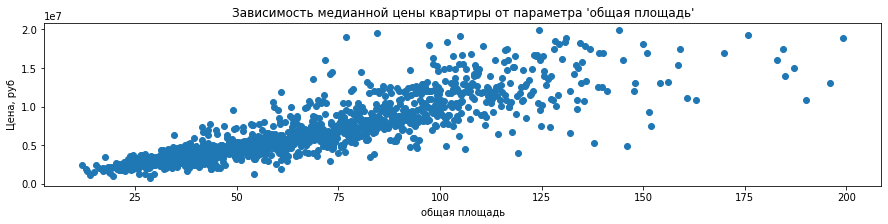

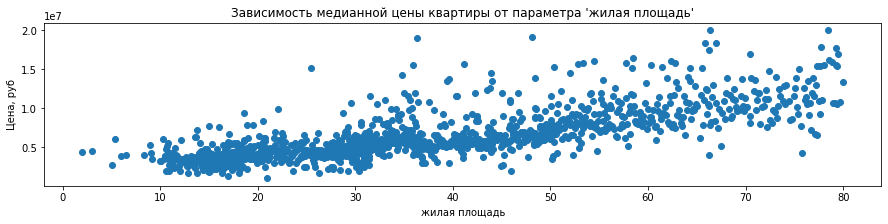

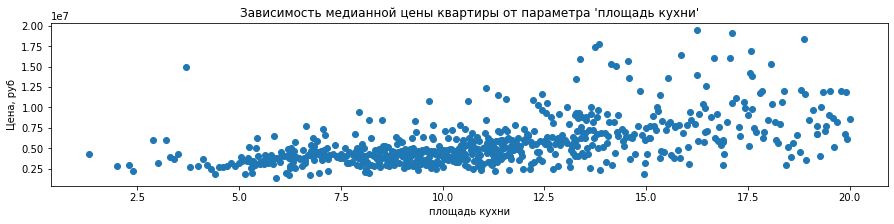

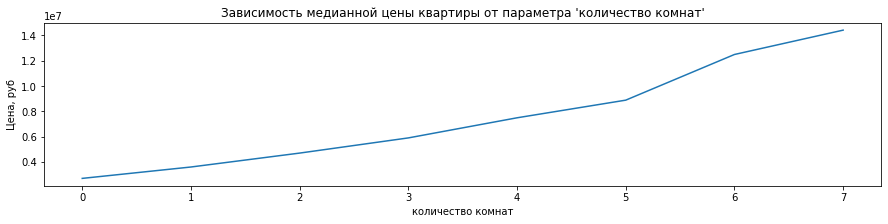

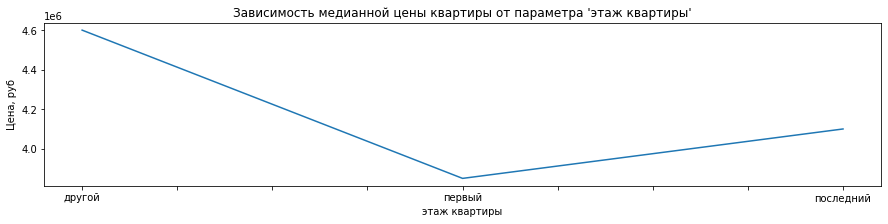

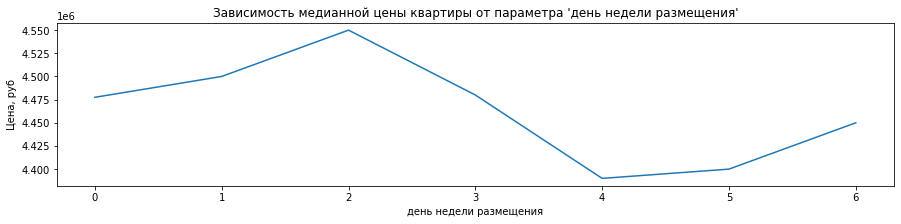

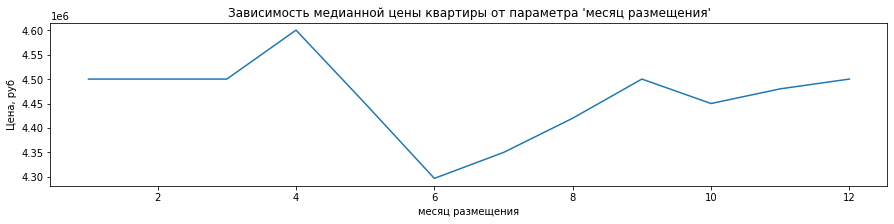

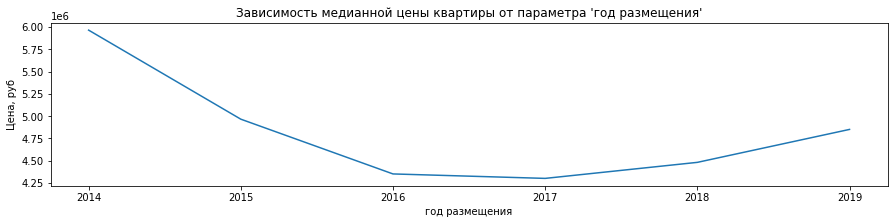

In [96]:
factor_columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'first_wkday_exposition', 
                  'first_month_exposition', 'first_year_exposition']
factor_names = ['общая площадь', 'жилая площадь', 'площадь кухни', 'количество комнат', 'этаж квартиры', 
                'день недели размещения', 'месяц размещения', 'год размещения']
factors_influence_data = pd.DataFrame({'parameter': [], 
                                       'pearson_correlation_coefficient': [],
                                       'pearson_correlation_coefficient_abs': []})
for i in range(len(factor_columns)):
    tittle = 'Зависимость медианной цены квартиры от параметра \'' + factor_names[i] + '\''
    xlabel = factor_names[i]
    if factor_columns[i] in ['total_area', 'living_area', 'kitchen_area']:
        (data.pivot_table(index=factor_columns[i], values='last_price', aggfunc=['median'])
         .plot(title=tittle, xlabel=xlabel, ylabel = 'Цена, руб', style='o', legend=False, figsize=(15, 3)))
    else:
        (data.pivot_table(index=factor_columns[i], values='last_price', aggfunc=['median'])
         .plot(title=tittle, xlabel=xlabel, ylabel = 'Цена, руб', style='-', legend=False, figsize=(15, 3)))
    try:
        pirson = data[factor_columns[i]].corr(data['last_price']).round(2)
        factors_influence_data = factors_influence_data.append({'parameter': factor_names[i], 
                                       'pearson_correlation_coefficient': pirson,
                                       'pearson_correlation_coefficient_abs': abs(pirson)}, ignore_index=True)
    except:
        factors_influence_data = factors_influence_data.append({'parameter': factor_names[i], 
                                       'pearson_correlation_coefficient': np.nan,
                                       'pearson_correlation_coefficient_abs': np.nan}, ignore_index=True)
factors_influence_data.sort_values(by='pearson_correlation_coefficient_abs', ascending=False)[['parameter', 'pearson_correlation_coefficient']]

##### Выводы

Наибольшее влияние на общую стоимость объекта оказывает общая площадь. Существует довольно тесная прямая зависимость (коэффициент корреляции Пирсона 0.74): чем больше площадь квартиры, тем выше цена. Также есть прямая зависимость цены от жилой площади и площади кухни (коэффициенты Пирсона 0.63 и 0.53 соостветственно). Также есть прямая зависимость между ценой квартиры и количеством комнат, но она слабее (коэффициенты Пирсона 0.46): чем больше комнат тем, дороже квартира, но это правило не работает для 5-ти комнатных квартир, так как они дешевле, чем 4-х комнатные. Зависимость стоимости квартиры от этажа следующая: квартиры на первом этаже на в среднем 5% дешевле квартир на последнем этаже. Между днём недели, месяцем, годом размещения объявления о продаже и ценой квартиры нет никакой прямой зависимости (коэффициент корреляции Пирсона 0.01), но есть некоторые закономерности. Например, квартиры, размещенные в среду на 5% дороже квартир, размещенных в пятницу. Квартиры, размещенные в июне на 5% дешевле средней цены по году и на 7% дешевле размещенных в апреле. Объявления о самых дорогих квартирах размещаются в апреле. В 2014 году медианная цена квартиры была на 30% выше, чем в 2017. Это объясняет, почему квартиры, размещенные в 2014-2015 годах продавались по 2-3 года. С 2017 года пошёл рост стоимости квартир и в 2019 году достиг уровня 2015 года.

### 4.3. Расчёт средней цены квадратного метра по населенным пунктам <a id='price_per_m2'> </a>

Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [97]:
mean_price_per_sq_m_by_locality = (data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
 .sort_values(by=('count', 'price_per_square_meter'), ascending=False).head(10))
mean_price_per_sq_m_by_locality.index.name = 'locality_name'
mean_price_per_sq_m_by_locality.columns = ['number_of_ads', 'mean_price_for_square_meter']
mean_price_per_sq_m_by_locality['mean_price_for_square_meter'] = mean_price_per_sq_m_by_locality['mean_price_for_square_meter'].round(2)
display(mean_price_per_sq_m_by_locality.sort_values(by='mean_price_for_square_meter', ascending=False))
print(f"Населённый пункт с самой высокой стоимостью квадратного метра: {mean_price_per_sq_m_by_locality['mean_price_for_square_meter'].idxmax()}")
print(f"Населённый пункт с самой низкой стоимостью квадратного метра: {mean_price_per_sq_m_by_locality['mean_price_for_square_meter'].idxmin()}")

,number_of_ads,mean_price_for_square_meter
locality_name,,
Санкт-Петербург,13213,108262.22
Пушкин,315,101027.68
деревня Кудрово,252,92953.06
посёлок Парголово,288,90709.02
посёлок Мурино,503,85621.44
посёлок Шушары,392,79103.10
Колпино,291,75465.46
Гатчина,271,68311.94
Всеволожск,346,66821.53


Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
Населённый пункт с самой низкой стоимостью квадратного метра: Выборг


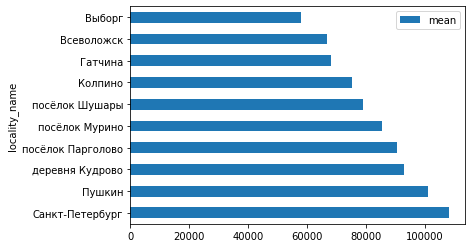

In [98]:
(
    data
    .groupby('locality_name')['price_per_square_meter']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).plot(y = 'mean', kind = 'barh');

### 4.4. Расчёт средней цены километра до центра города <a id='price_per_km'> </a>

Ранее мы посчитали расстояние до центра в километрах. Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра до центра. Посмотрим, как стоимость объектов зависит от расстояния до центра города.

Cредняя цена одного километра до центра: 801396.0
Коэффициент корреляции Пирсона для стоимости квартиры и расстояния до центра: -0.4
Коэффициент корреляции Пирсона для средней цены каждого километра до центра и расстояния до центра: -0.61


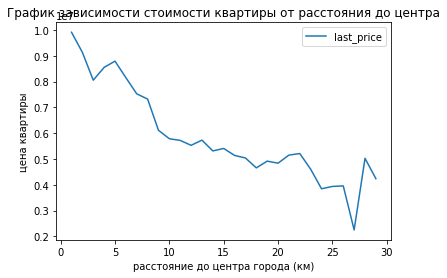

In [99]:
data = data.dropna(subset=['last_price', 'cityCenters_nearest_km'])
data = data.loc[(data['last_price'] != 0) & 
                (data['cityCenters_nearest_km'] != 0) & 
                (data['locality_name'] == 'Санкт-Петербург')]
data['price_per_km'] = data['last_price'] / data['cityCenters_nearest_km']
(data.pivot_table(index='cityCenters_nearest_km', values=['last_price'])
 .plot(title='График зависимости стоимости квартиры от расстояния до центра', xlabel='расстояние до центра города (км)', 
       ylabel='цена квартиры', style='-'))
print(f"Cредняя цена одного километра до центра: {data['price_per_km'].mean().round(0)}")
print(f"Коэффициент корреляции Пирсона для стоимости квартиры и расстояния до центра: \
{data['cityCenters_nearest_km'].corr(data['last_price']).round(2)}")
print(f"Коэффициент корреляции Пирсона для средней цены каждого километра до центра и расстояния до центра: \
{data['cityCenters_nearest_km'].corr(data['price_per_km']).round(2)}")

Также посмотрим зависимость цены за квадратный метр от расстояния до центра.

Коэффициент корреляции Пирсона для цены за кв.м. и расстояния до центра: -0.34


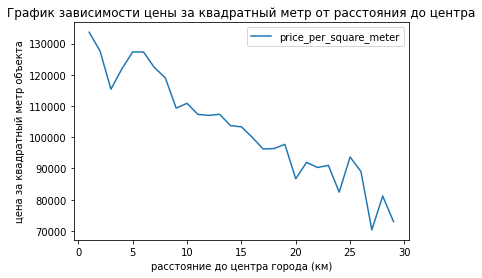

In [100]:
(data.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter')
 .plot(title='График зависимости цены за квадратный метр от расстояния до центра', xlabel='расстояние до центра города (км)', 
       ylabel='цена за квадратный метр объекта', style='-'))
print(f"Коэффициент корреляции Пирсона для цены за кв.м. и расстояния до центра: \
{data['price_per_square_meter'].corr(data['cityCenters_nearest_km']).round(2)}")

При отдалении от центра цена за объект уменьшается. Коэффициент корреляции -0.4, что говорит об умеренной обратной зависимости этих двух параметров. На графиках есть аномалии, например провал в общей стоимости и цене за кв. м. для объектов в радиусе 3 км от центра.

## 5. Итоги исследования <a id='research_results'> </a>

В данной работе был исследован архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах сервиса Яндекс Недвижимость.  
Была выполнена предобработка данных - обработали пропуски и аномальные значения, удалили дубликаты, изменили типы данных в некоторых столбцах и добавили новые столбцы для проведения анализа данных. Было обнаружено большое количество строк (23% от общего кол-ва) с полным отсутствием картографических данных. Необходимо провести работу по выявляению и устранению причин появления пропусков. Пропуски в данных, добавленных продавцом, вызваны в основном необязательностью заполнения полей формы и не знанием продавцом параметров своей квартиры. Чтобы уменьшить количество пропусков в данных, можно все поля формы для продавца обязательными для заполнения и добавить справочную информацию о различиях между апартаментами и квартирами и где продавец может посмотреть такие параметры квартиры, как высота потолка, жилая площадь и площадь кухни, чтобы заполнить все поля объявления.  
Далее данные были изучены и выявлены интересные особенности и зависимости, которые существуют на рынке недвижимости:  
1) на продажу выставляется очень мало квартир-студий: всего 0,7% от общего числа квартир. Люди не продают студии, а сдают их в аренду;  
2) большая часть квартир продается в 5-ти и 9-ти этажных домах;  
3) в выходные и праздничные дни публикуется в два раза меньше объявлений, чем в будние дни;  
4) наибольшее влияние на общую стоимость квартир оказывает общая площадь. Существует довольно тесная прямая зависимость: чем больше площадь квартиры, тем выше цена.  
5) существует прямая зависимость между ценой квартиры и количеством комнат, но она не работает для 5-ти комнатных квартир, так как они дешевле, чем 4-х комнатные.  
6) квартиры на первом этаже на в среднем 5% дешевле квартир на последнем этаже. Между днём недели, месяцем, годом размещения;  
7) квартиры, объявления о продаже которых были размещены в среду на 5% дороже квартир, размещенных в пятницу. 
8) квартиры, объявления о продаже которых были размещены в июне на 5% дешевле средней цены по году и на 7% дешевле размещенных в апреле, а объявления о самых дорогих квартирах размещаются в апреле;  
9) в 2014 году медианная цена квартиры была на 30% выше, чем в 2017, а с 2017 года пошёл рост стоимости квартир и в 2019 году достиг уровня 2015 года;  
10) средний срок продажи квартиры - 180 дней, медианный - 100 дней. Квартиры, размещенные в 2014-2015 годах, продавались от 2 до 4 лет вследствие высокой цены и экономического кризиса;  
11) населённый пункт с самой высокой стоимостью квадратного метра Санкт-Петербург, а с самой низкой - Выборг;  
12) средняя цена одного километра до центра 730411 рублей;  
13) с увеличением расстояния от центра цена за объект снижается, но объекты в радиусе 3 км от центра в среднем дешевле, чем в радиусе 5 км.